# Lead Scoring Case Study

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.



**Business Goal:**
- The company requires you to build a model wherein you need to assign a lead score between 0 and 100 to each of the leads, such that the customers with a higher lead score (‘Hot Leads’) have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Notebook Contents

I)   Reading and Inspecting Data <br>
II)   Data Cleaning (Dropping Insignificant Columns) <br>
III)  Imputing Missing Values <br>
IV)   Data Visualization and Exploratory Data Analysis <br>
V)    Data Pre-processing for Model Building <br>
VI)   Model Building <br>
VII)  Making Predictions and Model Evaluation <br>
VIII) Summarising the Metrics <br>
IX)   Recommendations <br>

# I) Reading and Inspecting Data

In [1]:
#importing necessary libraries for reading data and exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the warnings
import warnings
warnings.filterwarnings (action="ignore")

#### 1. Reading the CSV file

In [3]:
# Reading the 'leads.csv' file into a Pandas dataframe 'df'.
df = pd.read_csv('leads.csv')

#### 2. Preliminary Inspection

In [4]:
# Checking the dataframe's head
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
# Checking row and column count
df.shape

(9240, 37)

In [6]:
# Using info() to check the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking for null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Checking for percentage of null values for all columns
(df.isnull().sum()) / (len(df)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Checking some basic statistical figures
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [10]:
# Checking for duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


#### 3. Checking for Data Imbalance

In [11]:
# Checking for data imbalance with respect to the target variable 'Converted'
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

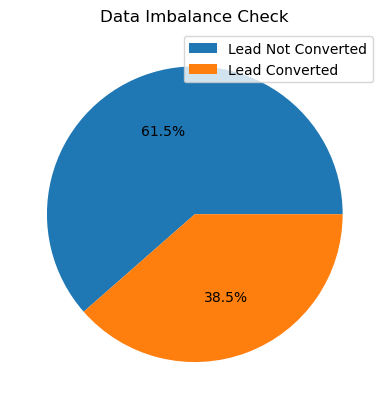

In [12]:
# Checking for data imbalance with respect to the target variable 'Converted'
DI_perc = (df['Converted'].value_counts()) / (len(df))*100
plt.pie(DI_perc, autopct='%1.1f%%')
plt.title("Data Imbalance Check")
plt.legend(['Lead Not Converted', 'Lead Converted'])
plt.show()

#### 4. Observations

1. The given dataset has 9240 rows (records) and 37 columns.
2. There are null values present in many of the columns. The four 'Asymmetrique' columns have high null count of around 45%. There is no information available on how this index and score values are calculated. 'Lead Quality' column also has a high null percentage of 51%. Hence, we will need to drop these columns.
3. There are no duplicate rows present in the dataset.
4. There is some data imbalance, as 61.5% of the data is skewed towards the 0 or 'Lead Not Converted' category.
5. There are a lot of 'Yes/No' type categorical variables, and we will need to convert these into binary values during model building.
6. There are some columns like 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Magazine', which have only 'No' as the category values. Hence, these will not be able to offer any contribution in our analysis and it is best to drop them.

## II) Data Cleaning (Dropping Insignificant Columns)

Before we begin data cleaning, we need to understand that the 'Select' category value in any column is as good as a null value, as it indicates that no category class has been selected. Hence, we need to convert these 'Select' values into null values for easier interpretation.

In [13]:
# Replacing 'Select' with null value
df.replace('Select', np.nan, inplace=True)

In [14]:
# Checking null count after doing the above replace operation
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
# Checking null count percentage after doing the above replace operation
(df.isnull().sum()) / (len(df)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [16]:
# Dropping 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Lead Quality', 'Lead Profile', 'How did you hear about X Education' as these have large number of null values
df.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Lead Quality', 'Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

In [17]:
# Checking distribution of column 'What matters most to you in choosing a course'
(df['What matters most to you in choosing a course'].value_counts() / len(df))*100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

We can observe that this variable has a highly skewed distribution where ~70% of the data is skewed towards 'Better Career Prospects', and the rest are majorly null values, with the other values being less than 0.05%. Hence, this variable will not provide us with any useful insights, and it is better to drop it.

In [18]:
# Dropping column 'What matters most to you in choosing a course' due to excessive number of null values
df.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [19]:
# Dropping all columns which have only a single category 'No'
df.drop(['Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Magazine'], axis=1, inplace=True)

In [20]:
# In the Lead Source column, We have 'Google' repeated as 'google', so we will standardize these entries
df.loc [df['Lead Source'] == 'google', 'Lead Source'] = 'Google'

## III) Imputing Missing Values

### 1. Numerical Variables

#### 1.1 - TotalVisits variable

In [21]:
# Statistics check
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [22]:
# Imputing the missing values with the median value
df.loc[df['TotalVisits'].isnull(), 'TotalVisits'] = df['TotalVisits'].quantile(0.5)

#### 1.2 - 'Page Views Per Visit' variable

In [23]:
# Statistics check
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [24]:
# Imputing the missing values with the median value
df.loc[df['Page Views Per Visit'].isnull(), 'Page Views Per Visit'] = df['Page Views Per Visit'].quantile(0.5)

### 2. Categorical Variables

In [25]:
# Checking for percentage of null values for all columns
(df.isnull().sum()) / (len(df)) * 100

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
What is your current occupation           29.112554
Search                                     0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Reco

#### 2.1 - Country

In [26]:
# Checking variable values distribution
df['Country'].value_counts(normalize=True).mul(100)

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

We can observe that the data is highly skewed, i.e ~96% of the values are 'India'.

#### 2.2 - City

In [27]:
# Checking variable values distribution
df['City'].value_counts(normalize=True).mul(100)

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

#### Data Mismatch Between Country and City

In [28]:
pd.set_option('display.max_rows', None)
df.loc [(df['Country'] != 'India') & (~df['Country'].isnull()) & (~df['City'].isnull()), ['Country', 'City'] ]

Country                         City
87                  Kuwait                       Mumbai
103                   Oman                       Mumbai
243          United States                       Mumbai
356                Bahrain                 Other Cities
411          United States           Other Metro Cities
419              Singapore           Other Metro Cities
425         United Kingdom                       Mumbai
433                  Qatar                 Other Cities
445              Australia                       Mumbai
483                  Ghana                 Other Cities
502              Singapore            Thane & Outskirts
517          United States            Thane & Outskirts
632           Saudi Arabia                 Other Cities
676         United Kingdom  Other Cities of Maharashtra
693          United States                       Mumbai
794   United Arab Emirates                       Mumbai
971           Saudi Arabia                       Mumbai
980                Belgium            Thane & Outskirts
1000  United Arab Emirates  Other Cities of Maharashtra
1018  United Arab Emirates                 Other Cities
1041                France  Other Cities of Maharashtra
1083                Kuwait                       Mumbai
1112                 Qatar            Thane & Outskirts
1161  United Arab Emirates                 Other Cities
1171          Saudi Arabia                 Other Cities
1180                France           Other Metro Cities
1193         United States                 Other Cities
1220                 China                       Mumbai
1338          Saudi Arabia                       Mumbai
1339               Bahrain                 Other Cities
1361                Kuwait                 Other Cities
1368               Bahrain                       Mumbai
1430                Canada                       Mumbai
1437           Netherlands            Thane & Outskirts
1488             Singapore                       Mumbai
1497                Kuwait                 Other Cities
1659  United Arab Emirates                       Mumbai
1704                France           Other Metro Cities
1865         United States            Thane & Outskirts
1945         United States                       Mumbai
1966               Nigeria           Other Metro Cities
1998             Hong Kong                 Other Cities
2116             Singapore  Other Cities of Maharashtra
2137         United States                 Other Cities
2308  United Arab Emirates                       Mumbai
2351  United Arab Emirates                 Other Cities
2370         United States  Other Cities of Maharashtra
2419  United Arab Emirates                       Mumbai
2576             Singapore                       Mumbai
2645               Germany                 Other Cities
2718             Singapore                       Mumbai
2811          Saudi Arabia                 Other Cities
2939  United Arab Emirates                       Mumbai
2951  United Arab Emirates                 Other Cities
2965             Singapore            Thane & Outskirts
3071             Australia                 Other Cities
3179        United Kingdom            Thane & Outskirts
3276             Singapore                 Other Cities
3390  United Arab Emirates                 Other Cities
3427  United Arab Emirates                       Mumbai
3459  United Arab Emirates                       Mumbai
3536  United Arab Emirates           Other Metro Cities
3567         United States                       Mumbai
3580             Hong Kong  Other Cities of Maharashtra
3669         United States                       Mumbai
3683               Nigeria                 Other Cities
3737             Singapore  Other Cities of Maharashtra
3793                 Qatar           Other Metro Cities
3811                  Oman           Other Metro Cities
3820                  Oman                 Other Cities
3853         United States           Other 

In the above output, we can observe that there is a mismatch in the dataset between the countries and the cities, even before we have done any imputation.<br>

Also, here, we cannot simply impute the missing values in city column with the mode value ('Mumbai' in this case). Because, if we do so, it will fill 'Mumbai' even in rows where the 'Country' is not 'India'.

Now, lets consider the below facts: <br>
1. The value distribution in the 'Country' variable is highly skewed.
2. The 'City' column seems India-specific.

Based on the above, we can proceed ahead by assuming that the 'Country' column has data entry/data capture errors, and proceed to drop it.

In [29]:
# Dropping columns 'Country'
df.drop(['Country'], axis=1, inplace=True)

Now, since we have removed the country variable and assumed this to be an India-specific dataset, we can impute the missing values in the City column with the mode value.

In [30]:
#Imputing the missing values with the mode
df.loc [df['City'].isnull(), 'City'] = df['City'].mode().iloc[0]

In [31]:
# Checking variable values distribution after imputing
df['City'].value_counts(normalize=True).mul(100)

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### 2.3 - Specialization

Even though this variable has a fairly significant number of null values (~36%), we will not drop it, as it may provide some valuable insights during EDA. Specialization is a very subjective parameter, and since we have 36% null percentage in this variable, imputing with the mode may cause unintended data skewness. Hence, we will imputing the missing values with a new category 'Unknown'.

In [32]:
# Checking variable values distribution
df['Specialization'].value_counts(normalize=True).mul(100)

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [33]:
# Imputing the missing values with a new category 'Unknown'.
# Because, we have 36% null percentage in this variable, and imputing all of the missing values with the mode value will cause data skewness.
df.loc [df['Specialization'].isnull(), 'Specialization'] = 'Unknown'

#### 2.4 - What is your current occupation

First, lets rename this variable to just 'Current Occupation' for better readability.

In [34]:
# Renaming column for better readability
df.rename(columns={'What is your current occupation': 'Current Occupation'}, inplace=True)

In [35]:
# Checking variable values distribution
df['Current Occupation'].value_counts(normalize=True).mul(100)

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: Current Occupation, dtype: float64

In [36]:
# We will impute the missing values with the mode value and observe whether it drastically affects the distribution
df.loc [df['Current Occupation'].isnull(), 'Current Occupation'] = df['Current Occupation'].mode().iloc[0]

In [37]:
# Checking variable values distribution after replacing null values
df['Current Occupation'].value_counts(normalize=True).mul(100)

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Current Occupation, dtype: float64

We can observe that, even after replacing the null values with the mode value 'Unemployed', the variable distribution does not drastically change. Hence, we are good to proceed.

#### 2.5 - Lead Source

In [38]:
# Checking variable values distribution
df['Lead Source'].value_counts(normalize=True).mul(100)

Google               31.214689
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
Click2call            0.043459
Social Media          0.021730
Live Chat             0.021730
Press_Release         0.021730
Pay per Click Ads     0.010865
blog                  0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
testone               0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In this case, we only have around 0.4% of null values. Hence, we can safely impute the missing values with the mode value, as it will not cause data skewness.

In [39]:
# Imputing missing values with the mode value
df.loc [df['Lead Source'].isnull(), 'Lead Source'] = df['Lead Source'].mode().iloc[0]

#### 2.6 - Tags

In [40]:
# Checking variable values distribution
df['Tags'].value_counts(normalize=True).mul(100)

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [41]:
# We will impute the missing values with the mode value and observe whether it drastically affects the distribution
df.loc [df['Tags'].isnull(), 'Tags'] = df['Tags'].mode().iloc[0]

In [42]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                             103
Specialization                              0
Current Occupation                          0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Tags                                        0
City                                        0
A free copy of Mastering The Inter

#### 2.7 - Last Activity

In [43]:
# Checking variable values distribution
df['Last Activity'].value_counts(normalize=True).mul(100)

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

As there are only ~1% of missing values, we can safely impute these values with the mode value.

In [44]:
# Imputing the missing values with the mode value
df.loc [df['Last Activity'].isnull(), 'Last Activity'] = df['Last Activity'].mode().iloc[0]

In [45]:
# Checking variable values distribution after imputation
df['Last Activity'].value_counts(normalize=True).mul(100)

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [46]:
pd.pivot_table (data=df, index='Converted', columns = 'A free copy of Mastering The Interview', values='City', aggfunc='count')

A free copy of Mastering The Interview    No   Yes
Converted                                         
0                                       3821  1858
1                                       2531  1030

In [47]:
pivot_table = pd.pivot_table(data=df,
                             index='Converted',
                             columns='A free copy of Mastering The Interview',
                             values='City',
                             aggfunc='count')

# Calculate row-wise totals
row_totals = pivot_table.sum(axis=1)

# Convert the pivot table counts to percentages
pivot_table_percentages = (pivot_table.div(row_totals, axis=0) * 100).round(2)

pivot_table_percentages

A free copy of Mastering The Interview     No    Yes
Converted                                           
0                                       67.28  32.72
1                                       71.08  28.92

## IV) Data Visualization and Exploratory Data Analysis

### 1 - Univariate Analysis of Numerical Variables

#### 1.1 - Univariate Analysis and Outlier Capping of TotalVisits variable

<AxesSubplot:xlabel='TotalVisits'>

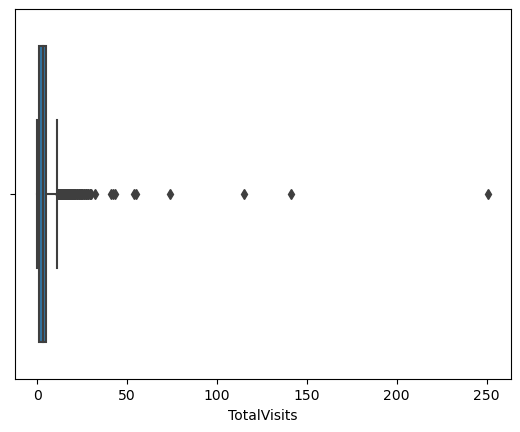

In [48]:
# Plotting a Boxplot of the variable 'Total Visits'
sns.boxplot(df['TotalVisits'])

As evident from the above plot, outliers exist and these need to be handled.

In [49]:
# We will cap these outlier values to the 99th percentile value
perc_99 = df['TotalVisits'].quantile(0.99)
df.loc[ df['TotalVisits'] > perc_99, 'TotalVisits'] = perc_99

<AxesSubplot:xlabel='TotalVisits'>

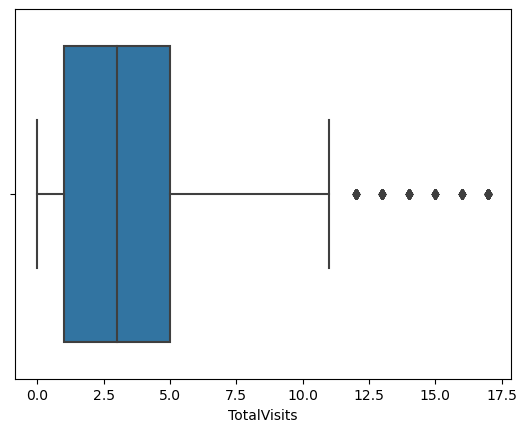

In [50]:
# Plotting a Boxplot of the variable 'Total Visits' to confirm that the outliers have been capped
sns.boxplot(df['TotalVisits'])

#### Observations

Median number of visits is around 3, with the maximum being 17.

#### 1.2 - Univariate Analysis and Outlier Capping of 'Total Time Spent on Website' variable

<AxesSubplot:xlabel='Total Time Spent on Website'>

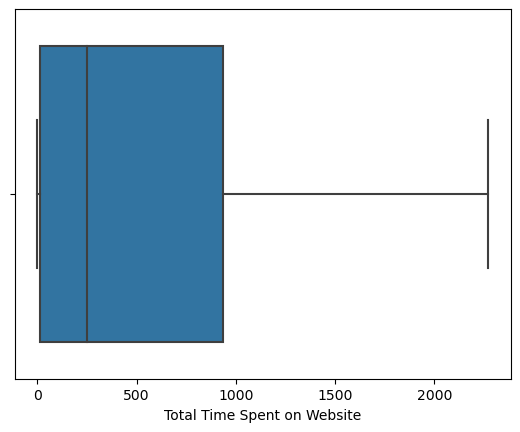

In [51]:
# Plotting a Boxplot of the variable 'Total Visits'
sns.boxplot(df['Total Time Spent on Website'])

We can observe that the median total time spent on the website is around 250 seconds. We cannot observe any outlier values present in this variable. Hence, no outlier handling is needed.

#### 1.3 - Univariate Analysis and Outlier Capping of 'Page Views Per Visit' variable

<AxesSubplot:xlabel='Page Views Per Visit'>

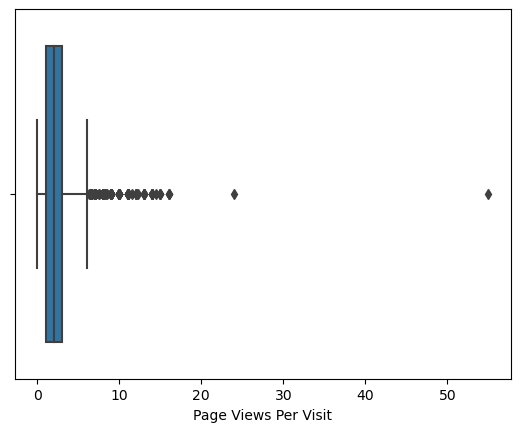

In [52]:
# Plotting a Boxplot of the variable 'Total Visits'
sns.boxplot(df['Page Views Per Visit'])

In [53]:
# We will cap these outlier values to the 99th percentile value
perc_99 = df['Page Views Per Visit'].quantile(0.99)
df.loc[ df['Page Views Per Visit'] > perc_99, 'Page Views Per Visit'] = perc_99

<AxesSubplot:xlabel='Page Views Per Visit'>

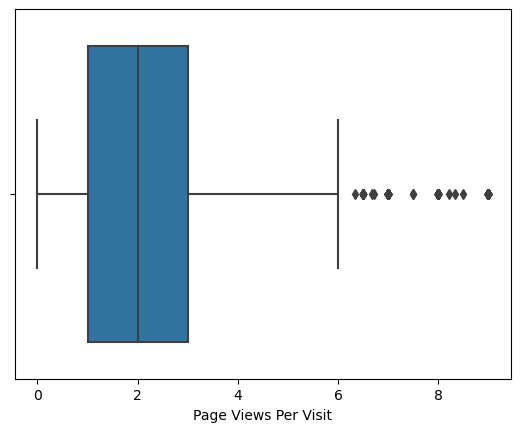

In [54]:
# Plotting a Boxplot of the variable 'Total Visits' to confirm that the outliers have been capped
sns.boxplot(df['Page Views Per Visit'])

We can observe that the median page views per visit is 2.

#### 1. Visualizing Numerical v/s Numerical Variables

In [55]:
# Choosing the numerical columns for the pair plot
plot_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
numplot_df = df[plot_columns]

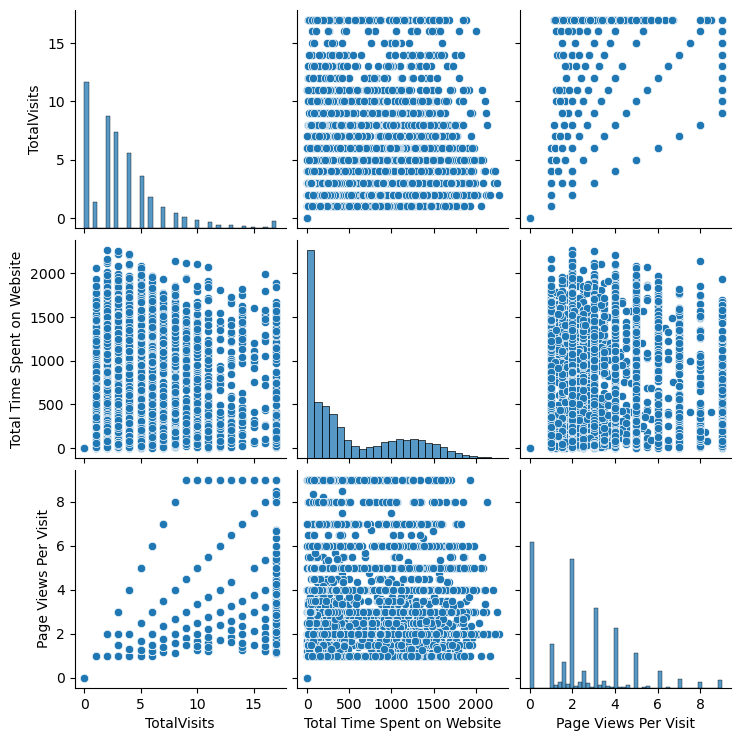

In [56]:
# Plotting a pair plot of the above columns
sns.pairplot(numplot_df)
plt.show()

No specific pattern can be identified from the above plots.

### 2. Bi-Variate Analysis - Visualising Numerical Variables v/s Target

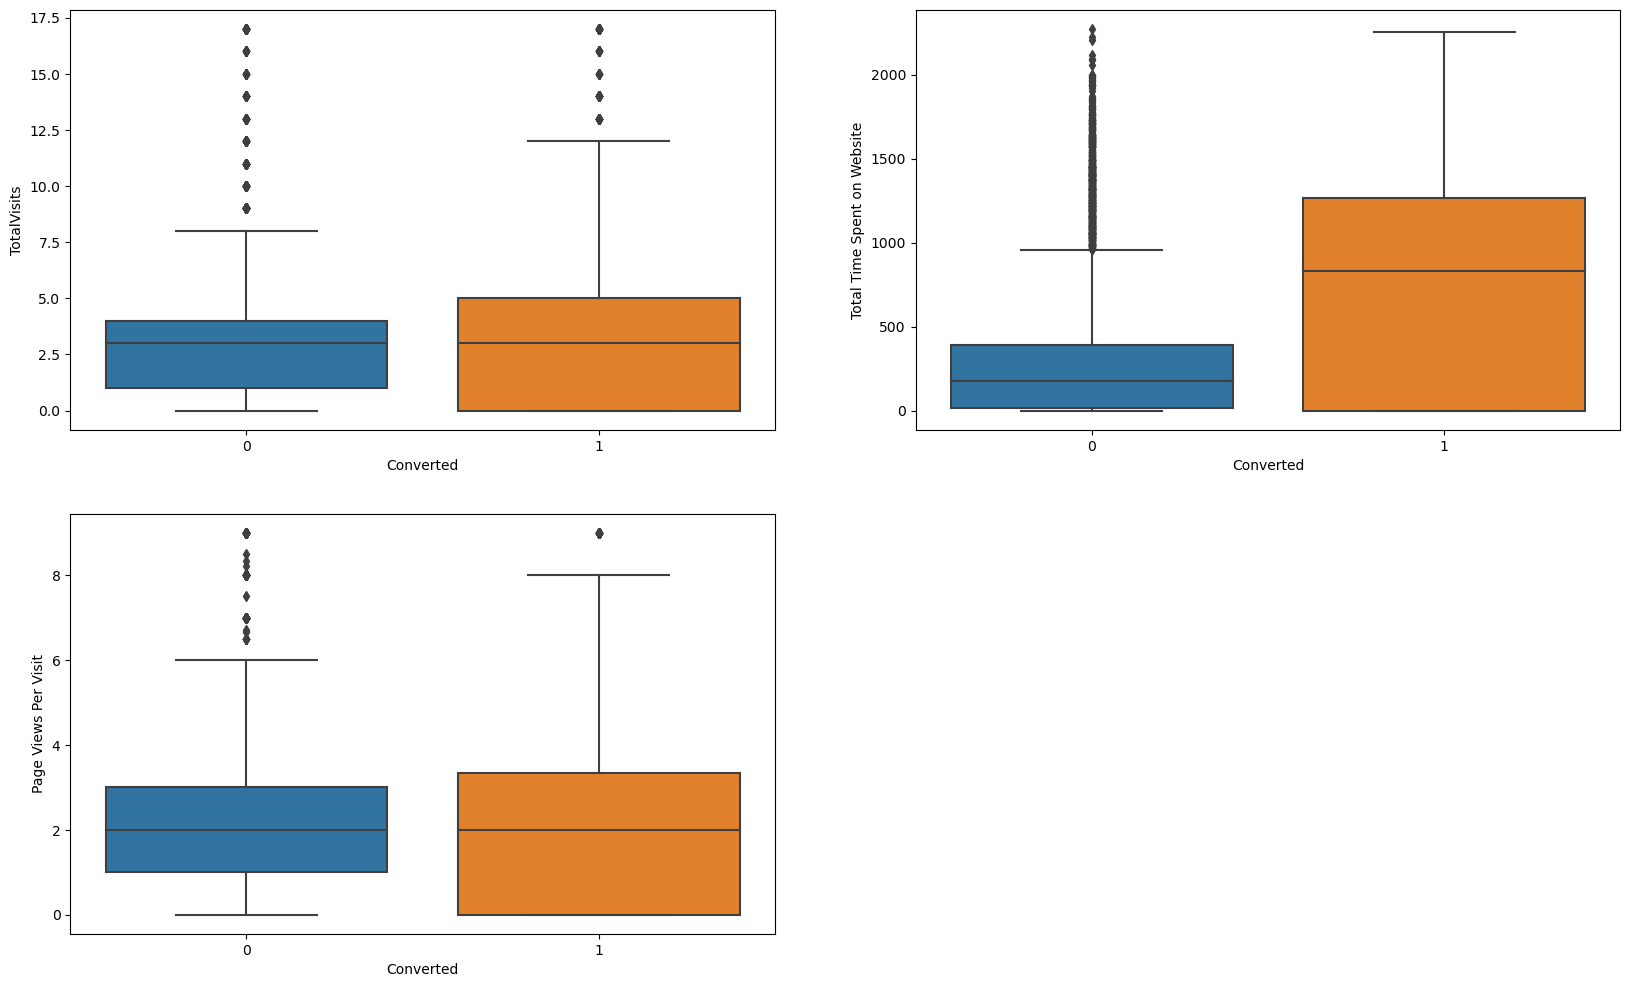

In [57]:
# Creating a subplot with boxplots of all categorical variables v/s the target variable 'Converted'.
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = df)
plt.show()

#### Observations

1. Median total visits and median page views per visit are more or less the same for both converted and non-converted leads.
2. Total time spent on site is significantly higher for the converted leads.

### 3. Bi-Variate Analysis - Visualising Categorical Variables v/s  Target

In [58]:
# Defining a user defined function to plot a horizontal stackedbar chart against the target variable
def hor_stacked_bar_chart(variable, chart_title, legend_title, stack):
    inp_table = pd.pivot_table(data=df, index='Converted', columns=variable, values='TotalVisits', aggfunc='count')
    
    total_count = inp_table.sum(axis=1) #calculating the sum of values across each row in the table
    inp_table_perc = inp_table.apply(lambda x: np.round(x/total_count*100,2), axis=0) #converting the table values to %
        
    ax = inp_table_perc.plot.barh(stacked=stack, legend=True) #plotting a bar chart
    plt.title(chart_title) #defining the chart title
    plt.ylabel('Lead Conversion Status') #defining the y-axis label
    plt.xlabel('Percentage') #defining the x-axis label
    plt.legend(title=legend_title, loc='center left', bbox_to_anchor=(1.0, 0.5)) #configuring the chart legend
    ax.set_xticks(range(0, 101, 10)) #to set the x-axis intervals to 10%
    
    return inp_table_perc, plt.show()

In [59]:
# Defining a user defined function to plot a horizontal stackedbar chart (with more colours) against the target variable
def hor_stacked_bar_chart_extracolors(variable, chart_title, legend_title, stack):
    inp_table = pd.pivot_table(data=df, index='Converted', columns=variable, values='TotalVisits', aggfunc='count')
    
    total_count = inp_table.sum(axis=1) #calculating the sum of values across each row in the table
    inp_table_perc = inp_table.apply(lambda x: np.round(x/total_count*100,2), axis=0) #converting the table values to %
    
    custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta',
                 'lightblue', 'lightgreen', 'lightcoral', 'beige', 'fuchsia', 'gold',
                 'goldenrod', 'lightgray', 'lightcyan', 'cadetblue']
    
    ax = inp_table_perc.plot.barh(stacked=stack, legend=True, color=custom_colors) #plotting a bar chart
    plt.title(chart_title) #defining the chart title
    plt.ylabel('Lead Conversion Status') #defining the y-axis label
    plt.xlabel('Percentage') #defining the x-axis label
    plt.legend(title=legend_title, loc='center left', bbox_to_anchor=(1.0, 0.5)) #configuring the chart legend
    ax.set_xticks(range(0, 101, 10)) #to set the x-axis intervals to 10%
    
    return inp_table_perc, plt.show()

#### 3.1 - Do Not Email

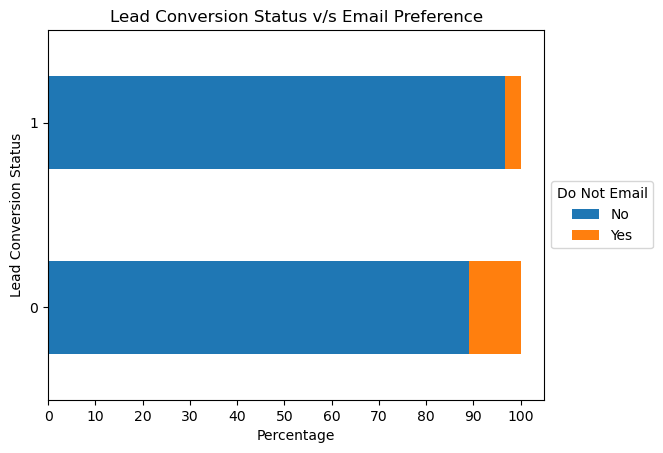

(Do Not Email     No    Yes
 Converted                 
 0             89.15  10.85
 1             96.69   3.31,
 None)

In [60]:
# Converted v/s Do Not Email
hor_stacked_bar_chart('Do Not Email', 'Lead Conversion Status v/s Email Preference', 'Do Not Email', True)

Observations: A vast majority have opted to not receive e-mails, for both lead categories.

#### 3.2 - Do Not Call

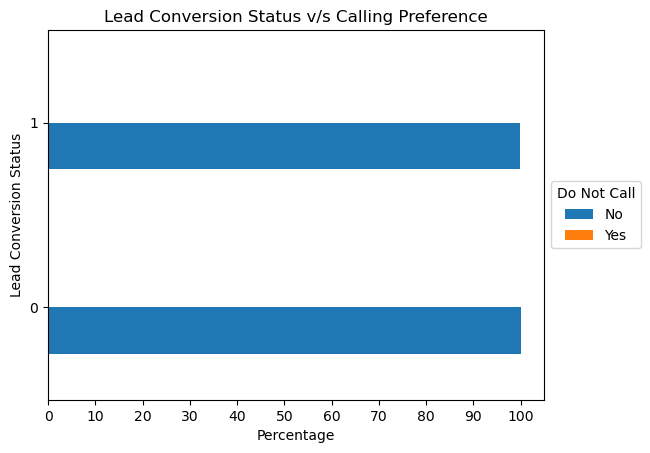

(Do Not Call      No   Yes
 Converted                
 0            100.00   NaN
 1             99.94  0.06,
 None)

In [61]:
# Converted v/s Do Not Call
hor_stacked_bar_chart('Do Not Call', 'Lead Conversion Status v/s Calling Preference', 'Do Not Call', False)

Observations: A vast majority have opted not to be called, for both lead categories. Not a single non-converted lead has opted yes. This may probably due to the fear of receiving spam calls. Inspite of this, we will not drop this variable at this point, as this represents the sentiment of the lead. Whether somebody wishes to be contacted regarding the course is an indicator of his/her interest towards pursuing the course.

#### 3.3 - Search

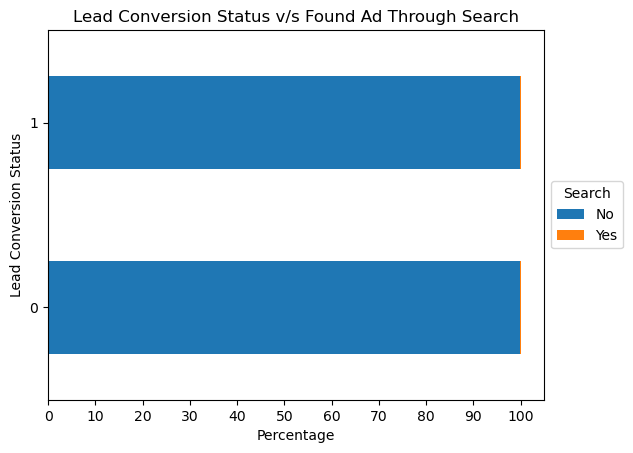

(Search        No   Yes
 Converted             
 0          99.84  0.16
 1          99.86  0.14,
 None)

In [62]:
# Converted v/s Search
hor_stacked_bar_chart('Search', 'Lead Conversion Status v/s Found Ad Through Search', 'Search', True)

Observations: A vast majority (~99%) did not find the ad through search, for both lead categories. 'Yes' values are miniscule in number.

#### 3.4 - Newspaper Article

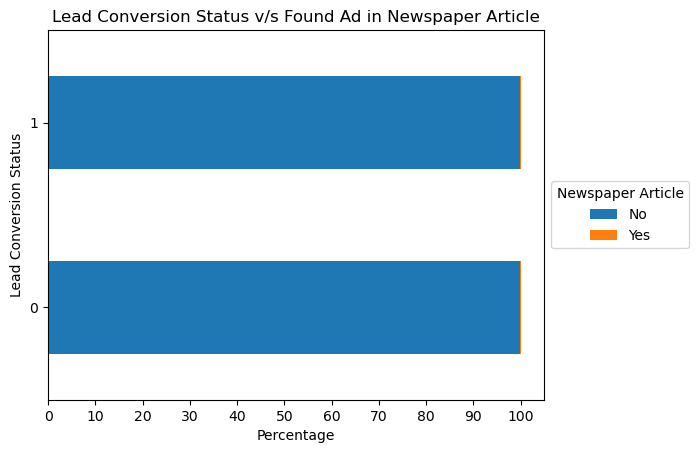

(Newspaper Article     No   Yes
 Converted                     
 0                  99.98  0.02
 1                  99.97  0.03,
 None)

In [63]:
# Converted v/s Newspaper Article
hor_stacked_bar_chart('Newspaper Article', 'Lead Conversion Status v/s Found Ad in Newspaper Article', 'Newspaper Article', True)

Observations: A vast majority (~99%) did not find the ad through newspaper articles, for both lead categories. 'Yes' values are miniscule in number.

#### 3.5 - Newspaper

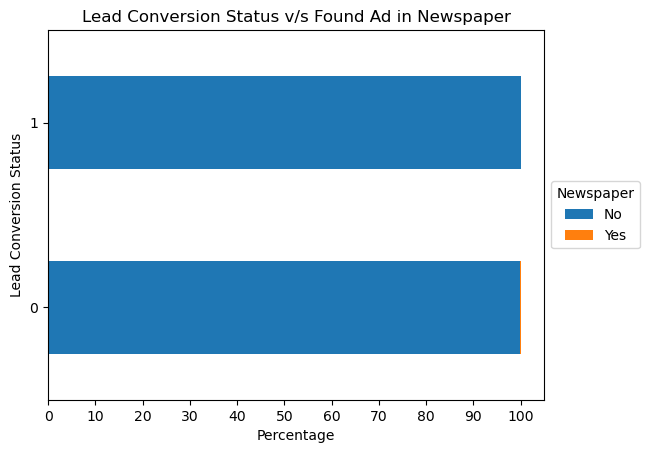

(Newspaper      No   Yes
 Converted              
 0           99.98  0.02
 1          100.00   NaN,
 None)

In [64]:
# Converted v/s Newspaper
hor_stacked_bar_chart('Newspaper', 'Lead Conversion Status v/s Found Ad in Newspaper', 'Newspaper', True)

Observations: A vast majority (~99%) did not find the ad through newspaper, for both lead categories. 'Yes' values are miniscule in number. Not a single converted lead through this source.

#### 3.6 - X Education Forums

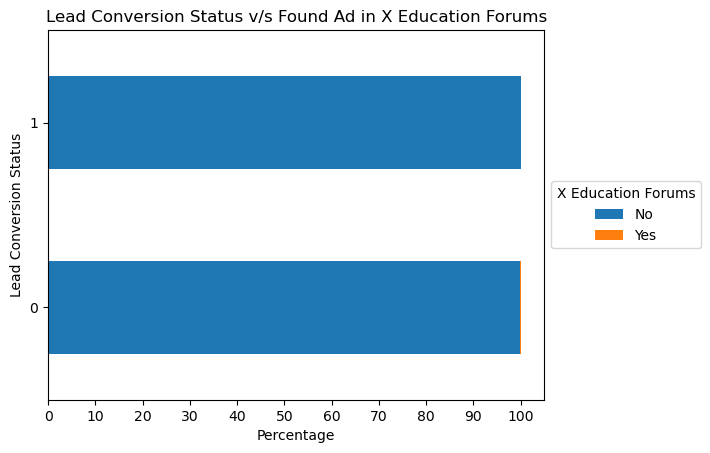

(X Education Forums      No   Yes
 Converted                       
 0                    99.98  0.02
 1                   100.00   NaN,
 None)

In [65]:
# Converted v/s X Education Forums
hor_stacked_bar_chart('X Education Forums', 'Lead Conversion Status v/s Found Ad in X Education Forums', 'X Education Forums', True)

Observations: A vast majority (~99%) did not find the ad through X-Education forums, for both lead categories. 'Yes' values are miniscule in number. Not a single converted lead through this source.

#### 3.7 - Digital Advertisement

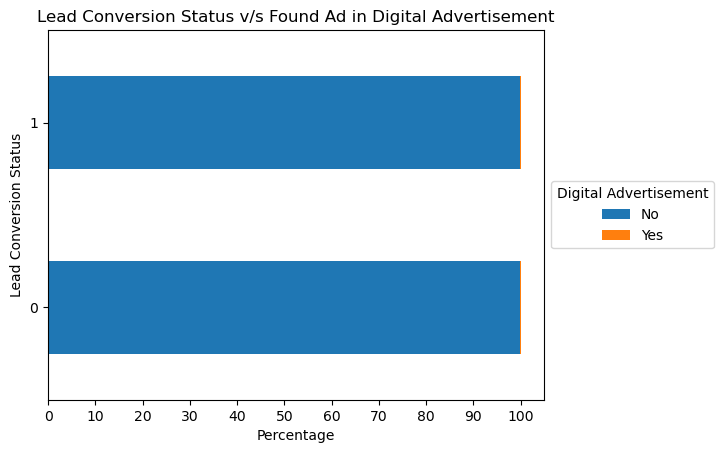

(Digital Advertisement     No   Yes
 Converted                         
 0                      99.95  0.05
 1                      99.97  0.03,
 None)

In [66]:
# Converted v/s Digital Advertisement
hor_stacked_bar_chart('Digital Advertisement', 'Lead Conversion Status v/s Found Ad in Digital Advertisement', 'Digital Advertisement', True)

Observations: A vast majority (~99%) did not find the ad through digital ads, for both lead categories. 'Yes' values are miniscule in number.

#### 3.8 - Through Recommendations

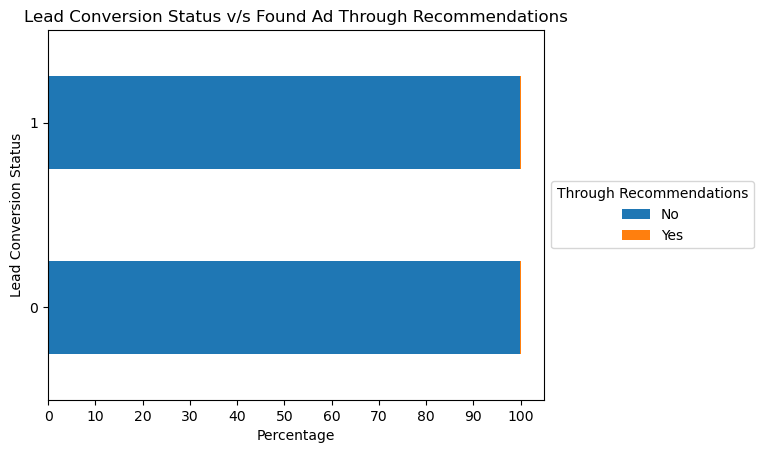

(Through Recommendations     No   Yes
 Converted                           
 0                        99.96  0.04
 1                        99.86  0.14,
 None)

In [67]:
# Converted v/s Through Recommendations
hor_stacked_bar_chart('Through Recommendations', 'Lead Conversion Status v/s Found Ad Through Recommendations', 'Through Recommendations', True)

Observations: A vast majority (~99%) did not find the ad through recommendations, for both lead categories. 'Yes' values are miniscule in number.

#### 3.9 - A free copy of Mastering The Interview

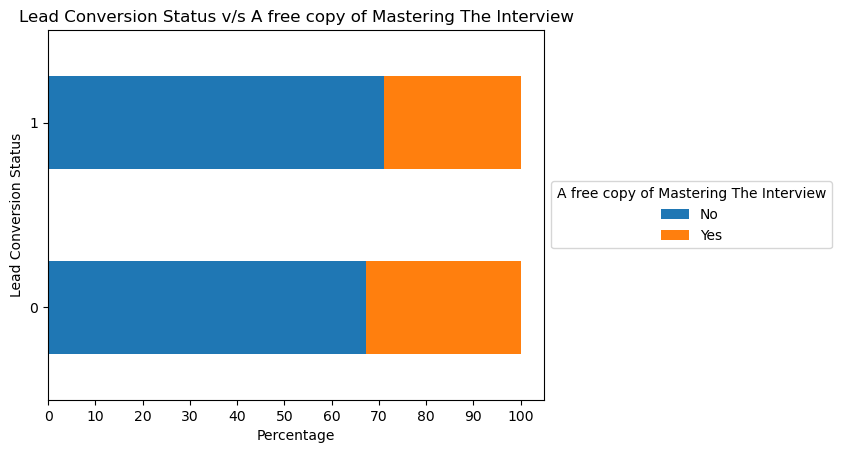

(A free copy of Mastering The Interview     No    Yes
 Converted                                           
 0                                       67.28  32.72
 1                                       71.08  28.92,
 None)

In [68]:
# Converted v/s Through Recommendations
hor_stacked_bar_chart('A free copy of Mastering The Interview', 'Lead Conversion Status v/s A free copy of Mastering The Interview', 'A free copy of Mastering The Interview', True)

Observations: Majority (around 70% in both lead categories) have opted 'No'. There is no significant difference in the value distribution between both lead categories, which suggests that this is not an influencing parameter.

#### 3.10 - City

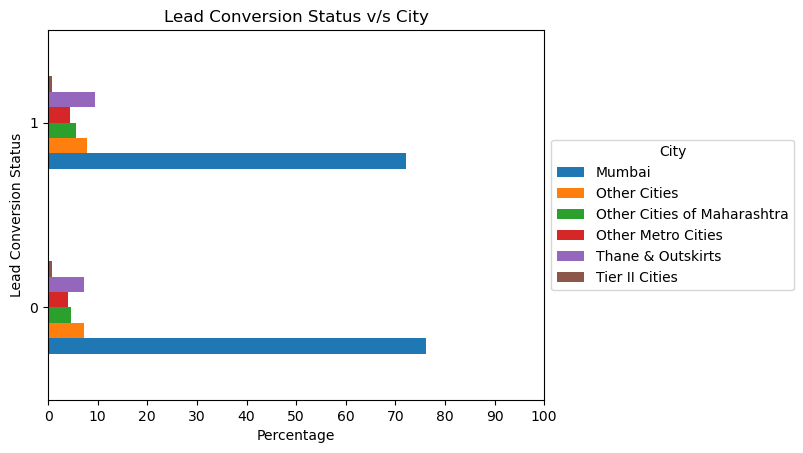

(City       Mumbai  Other Cities  Other Cities of Maharashtra  \
 Converted                                                      
 0           76.16          7.22                         4.51   
 1           72.06          7.75                         5.64   
 
 City       Other Metro Cities  Thane & Outskirts  Tier II Cities  
 Converted                                                         
 0                        3.96               7.29            0.86  
 1                        4.35               9.49            0.70  ,
 None)

In [69]:
# Converted v/s City
hor_stacked_bar_chart('City', 'Lead Conversion Status v/s City', 'City', False)

Observations - Mumbai is the dominant city, by a huge margin.

#### 3.11 - Current Occupation

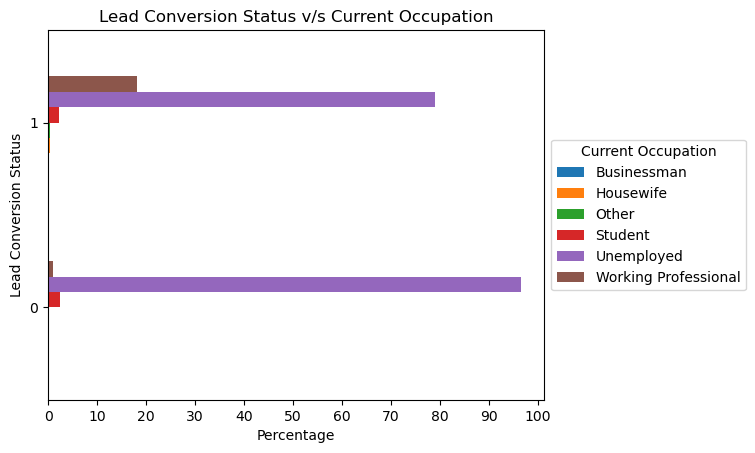

(Current Occupation  Businessman  Housewife  Other  Student  Unemployed  \
 Converted                                                                
 0                          0.05        NaN   0.11     2.32       96.48   
 1                          0.14       0.28   0.28     2.19       78.94   
 
 Current Occupation  Working Professional  
 Converted                                 
 0                                   1.04  
 1                                  18.17  ,
 None)

In [70]:
# Converted v/s Current Occupation
hor_stacked_bar_chart('Current Occupation', 'Lead Conversion Status v/s Current Occupation', 'Current Occupation', False)

Observations - Unemployed is the dominant category, by a huge margin. Working professional is a distant second.

#### 3.12 - Lead Source

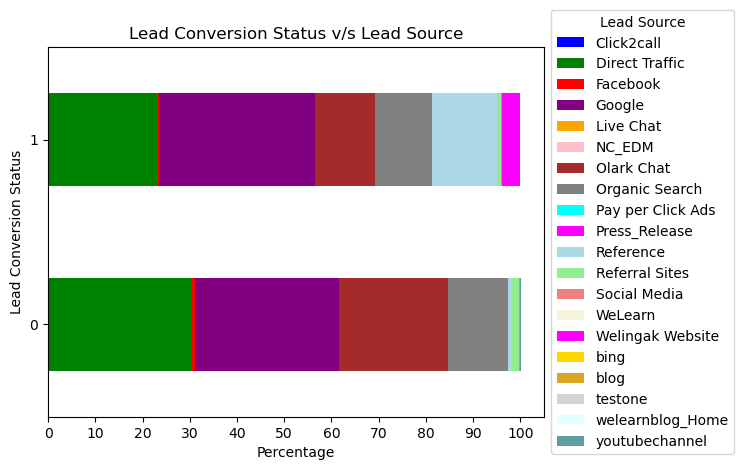

(Lead Source  Click2call  Direct Traffic  Facebook  Google  Live Chat  NC_EDM  \
 Converted                                                                      
 0                  0.02           30.38      0.74   30.52        NaN     NaN   
 1                  0.08           22.97      0.37   33.02       0.06    0.03   
 
 Lead Source  Olark Chat  Organic Search  Pay per Click Ads  Press_Release  \
 Converted                                                                   
 0                 23.01           12.64               0.02           0.04   
 1                 12.58           12.24                NaN            NaN   
 
 Lead Source  Reference  Referral Sites  Social Media  WeLearn  \
 Converted                                                       
 0                 0.77            1.66          0.02      NaN   
 1                13.76            0.87          0.03     0.03   
 
 Lead Source  Welingak Website  bing  blog  testone  welearnblog_Home  \
 Converted           

In [71]:
# Converted v/s Lead Source
hor_stacked_bar_chart_extracolors ('Lead Source', 'Lead Conversion Status v/s Lead Source', 'Lead Source', True)

There are too many categories in this variable, and quite a few of them have miniscule representation (less than 1%); individually, these categories will not have significant contribution to the model. Hence, it is better to club these into a new category named 'Others' in the interest of simplifying our model.

In [72]:
# Replacing categories with less than 1% representation in both lead categories with 'Others'
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

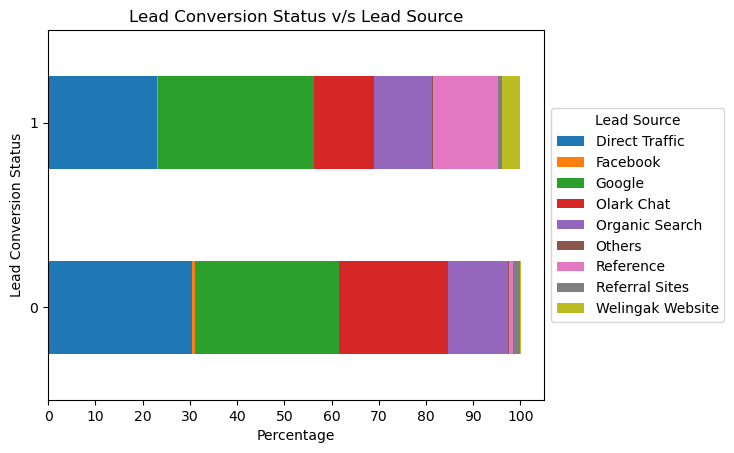

(Lead Source  Direct Traffic  Facebook  Google  Olark Chat  Organic Search  \
 Converted                                                                   
 0                     30.38      0.74   30.52       23.01           12.64   
 1                     22.97      0.37   33.02       12.58           12.24   
 
 Lead Source  Others  Reference  Referral Sites  Welingak Website  
 Converted                                                         
 0              0.25       0.77            1.66              0.04  
 1              0.25      13.76            0.87              3.93  ,
 None)

In [73]:
# Visualising again after cleaning up the categories
hor_stacked_bar_chart ('Lead Source', 'Lead Conversion Status v/s Lead Source', 'Lead Source', True)

Observations - Google and Direct traffic are the top lead sources. For the converted leads, Google is the top lead source, followed by Direct Traffic and Reference.

#### 3.13 - Lead Origin

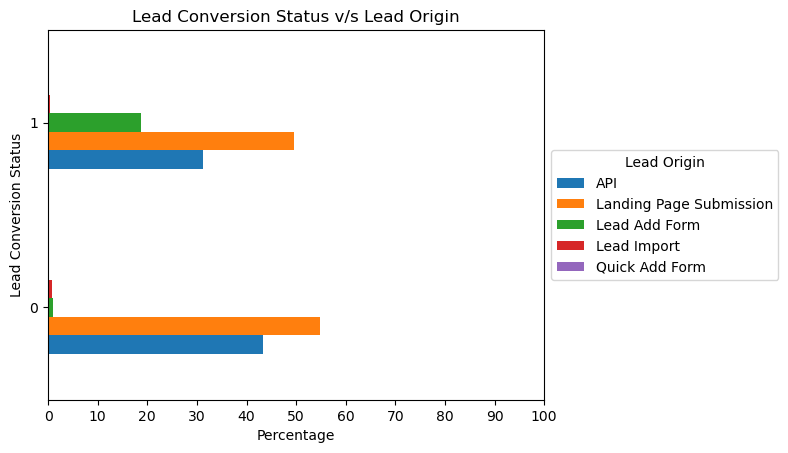

(Lead Origin    API  Landing Page Submission  Lead Add Form  Lead Import  \
 Converted                                                                 
 0            43.41                    54.90           0.95         0.74   
 1            31.31                    49.65          18.65         0.37   
 
 Lead Origin  Quick Add Form  
 Converted                    
 0                       NaN  
 1                      0.03  ,
 None)

In [74]:
# Converted v/s Lead Source
hor_stacked_bar_chart('Lead Origin', 'Lead Conversion Status v/s Lead Origin', 'Lead Origin', False)

Observations - Landing Page Submission is the dominant category, followed by API and Lead Add Form.

#### 3.14 - Specialization

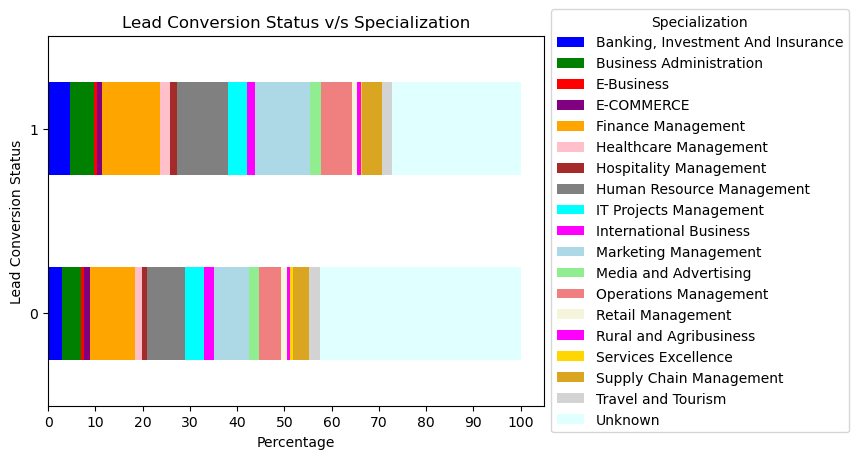

(Specialization  Banking, Investment And Insurance  Business Administration  \
 Converted                                                                    
 0                                            3.01                     3.94   
 1                                            4.69                     5.03   
 
 Specialization  E-Business  E-COMMERCE  Finance Management  \
 Converted                                                    
 0                     0.63        1.27                9.51   
 1                     0.59        1.12               12.24   
 
 Specialization  Healthcare Management  Hospitality Management  \
 Converted                                                       
 0                                1.41                    1.16   
 1                                2.22                    1.35   
 
 Specialization  Human Resource Management  IT Projects Management  \
 Converted                                                           
 0                    

In [75]:
# Converted v/s Lead Source
hor_stacked_bar_chart_extracolors('Specialization', 'Lead Conversion Status v/s Specialization', 'Specialization', True)

Observations - Converted leads have less unknown values for specialzation. This suggests that the converted leads provide proper information as they are actually interested in pursuing the course.

#### 3.15 - Last Activity

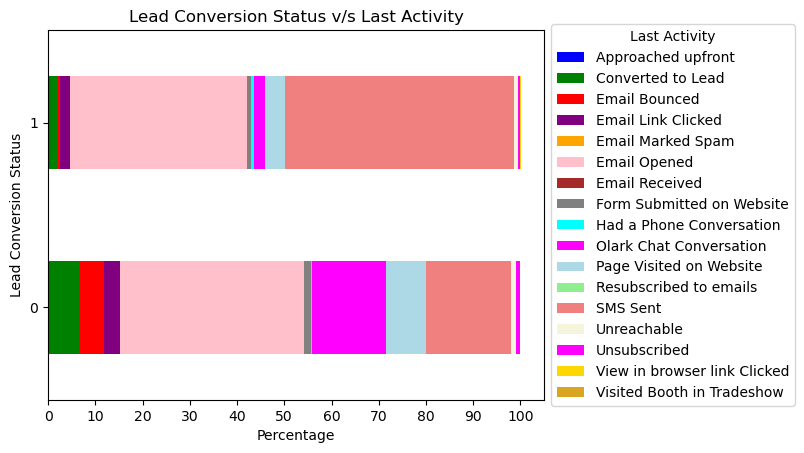

(Last Activity  Approached upfront  Converted to Lead  Email Bounced  \
 Converted                                                             
 0                             NaN               6.59           5.28   
 1                            0.25               1.52           0.73   
 
 Last Activity  Email Link Clicked  Email Marked Spam  Email Opened  \
 Converted                                                            
 0                            3.42                NaN         38.84   
 1                            2.05               0.06         37.46   
 
 Last Activity  Email Received  Form Submitted on Website  \
 Converted                                                  
 0                         NaN                       1.55   
 1                        0.06                       0.79   
 
 Last Activity  Had a Phone Conversation  Olark Chat Conversation  \
 Converted                                                          
 0                                  0.14

In [76]:
# Converted v/s Last Activity
hor_stacked_bar_chart_extracolors('Last Activity', 'Lead Conversion Status v/s Last Activity', 'Last Activity', True)

There are too many categories in this variable, and quite a few of them have miniscule representation (less than 1%); individually, these categories will not have significant contribution to the model. Hence, it is better to club these into a new category named 'Others' in the interest of simplifying our model.

In [77]:
# Replacing categories with less than 0.5% representation in both lead categories with 'Others'
df['Last Activity'] = df['Last Activity'].replace(['Approached upfront', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'View in browser link Clicked', 'Visited Booth in Tradeshow'], 'Others')

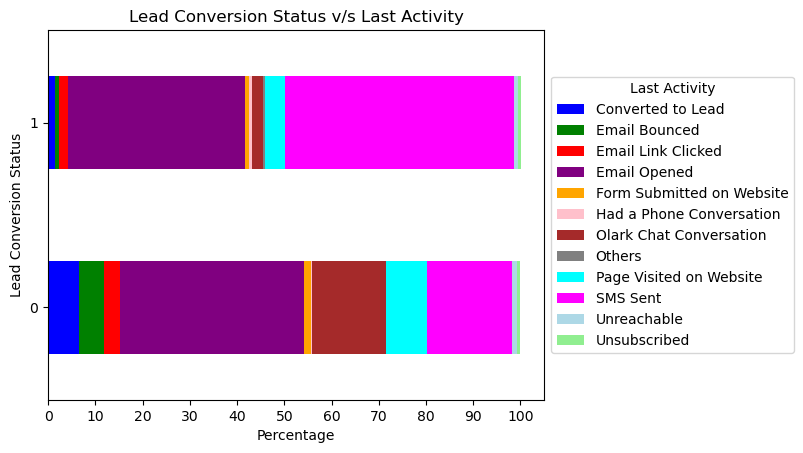

(Last Activity  Converted to Lead  Email Bounced  Email Link Clicked  \
 Converted                                                             
 0                           6.59           5.28                3.42   
 1                           1.52           0.73                2.05   
 
 Last Activity  Email Opened  Form Submitted on Website  \
 Converted                                                
 0                     38.84                       1.55   
 1                     37.46                       0.79   
 
 Last Activity  Had a Phone Conversation  Olark Chat Conversation  Others  \
 Converted                                                                  
 0                                  0.14                    15.65    0.11   
 1                                  0.62                     2.36    0.42   
 
 Last Activity  Page Visited on Website  SMS Sent  Unreachable  Unsubscribed  
 Converted                                                                    
 0  

In [78]:
# Visualising again after cleaning up the categories
hor_stacked_bar_chart_extracolors('Last Activity', 'Lead Conversion Status v/s Last Activity', 'Last Activity', True)

Observations - 'SMS Sent' is the top last activity among the converted leads, followed by 'Email Opened' and 'Page Visited on Website'.

#### 3.16 - Last Notable Activity

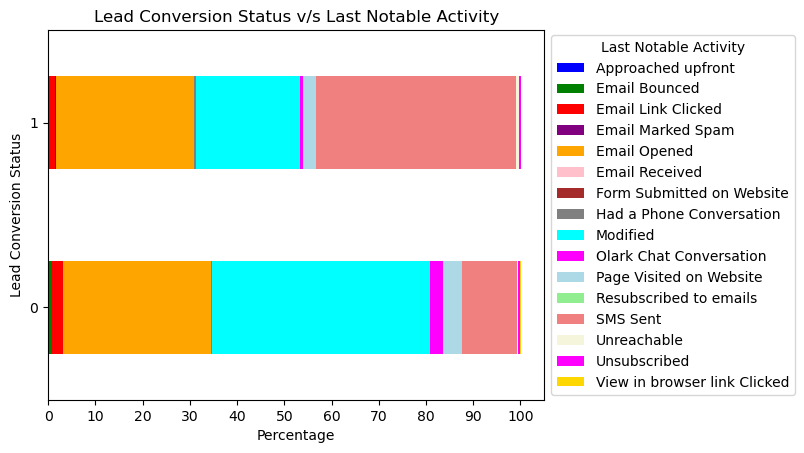

(Last Notable Activity  Approached upfront  Email Bounced  Email Link Clicked  \
 Converted                                                                      
 0                                     NaN           0.90                2.25   
 1                                    0.03           0.25                1.26   
 
 Last Notable Activity  Email Marked Spam  Email Opened  Email Received  \
 Converted                                                                
 0                                    NaN         31.40             NaN   
 1                                   0.06         29.32            0.03   
 
 Last Notable Activity  Form Submitted on Website  Had a Phone Conversation  \
 Converted                                                                    
 0                                           0.02                      0.02   
 1                                            NaN                      0.37   
 
 Last Notable Activity  Modified  Olark Chat Conversat

In [79]:
# Converted v/s Last Notable Activity
hor_stacked_bar_chart_extracolors('Last Notable Activity', 'Lead Conversion Status v/s Last Notable Activity', 'Last Notable Activity', True)

There are too many categories in this variable, and quite a few of them have miniscule representation (less than 1%); individually, these categories will not have significant contribution to the model. Hence, it is better to club these into a new category named 'Others' in the interest of simplifying our model.

In [80]:
# Replacing categories with very less representation in both lead categories with 'Others'
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Approached upfront', 'Email Marked Spam', 'Email Received', 'Form Submitted on Website', 'Resubscribed to emails', 'View in browser link Clicked'], 'Others')

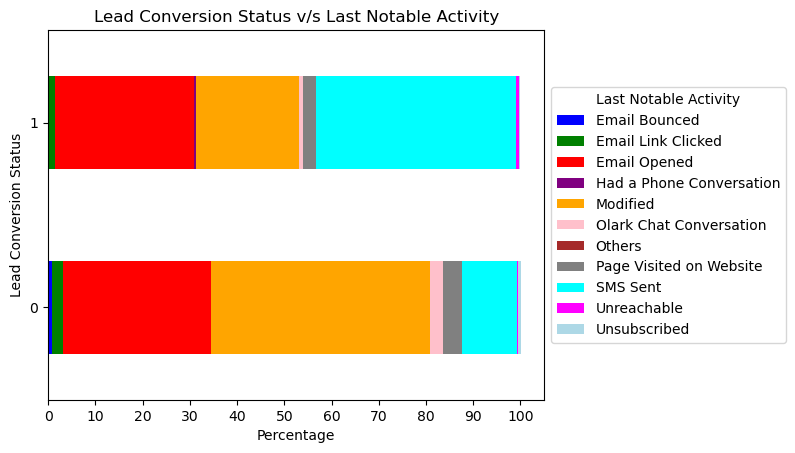

(Last Notable Activity  Email Bounced  Email Link Clicked  Email Opened  \
 Converted                                                                
 0                               0.90                2.25         31.40   
 1                               0.25                1.26         29.32   
 
 Last Notable Activity  Had a Phone Conversation  Modified  \
 Converted                                                   
 0                                          0.02     46.21   
 1                                          0.37     21.99   
 
 Last Notable Activity  Olark Chat Conversation  Others  \
 Converted                                                
 0                                         2.78    0.04   
 1                                         0.70    0.14   
 
 Last Notable Activity  Page Visited on Website  SMS Sent  Unreachable  \
 Converted                                                               
 0                                         3.96     11.69     

In [81]:
# Visualising again after cleaning up the categories
hor_stacked_bar_chart_extracolors('Last Notable Activity', 'Lead Conversion Status v/s Last Notable Activity', 'Last Notable Activity', True)

Observations - 'SMS Sent' is the top last notable activity among the converted leads, followed by 'Email Opened' and 'Modified'. This variable seems too similar to the 'Last Activity' variable, and we may need to drop any one of these variables going forward, after a correlation check.

In this case, we will take a call to drop 'Last Activity' and retain 'Last Notable Activity' due to the below reasons: <br>
1. 'Last Notable Activity' had no missing values, and hence we can trust the data in this column more, as the data has more "integrity". For 'Last Activity', there were missing values which were imputed with the mode; although an accepted method, this may not be entirely accurate.
2. The 'Notable' in the variable name suggests that these activites may be more relevant in the context of this analysis.

In [82]:
# Dropping 'Last Activity'
df.drop('Last Activity', axis=1, inplace=True)

#### 3.17 - Tags

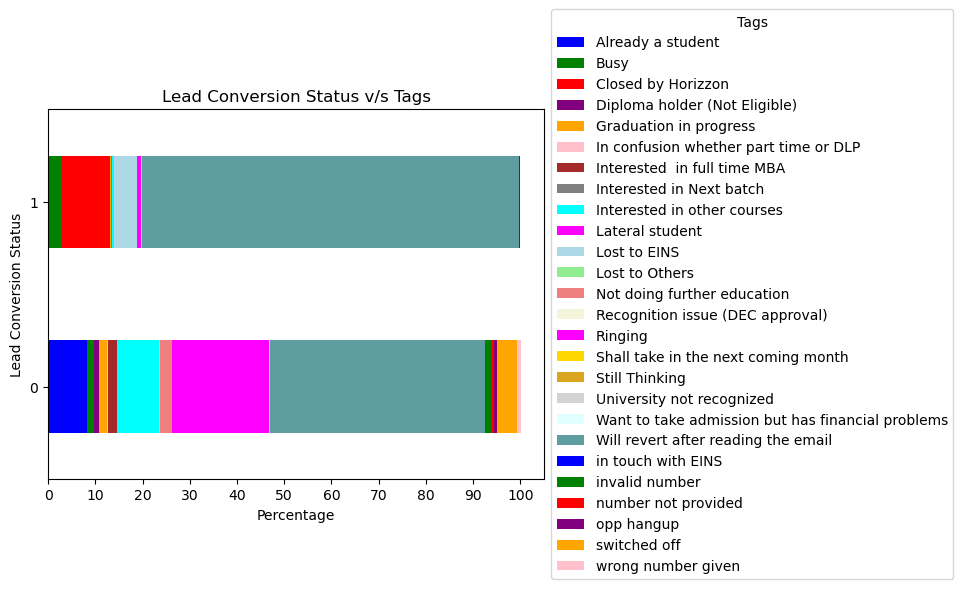

(Tags       Already a student  Busy  Closed by Horizzon  \
 Converted                                                
 0                       8.14  1.43                0.04   
 1                       0.08  2.95               10.00   
 
 Tags       Diploma holder (Not Eligible)  Graduation in progress  \
 Converted                                                          
 0                                   1.09                    1.83   
 1                                   0.03                    0.20   
 
 Tags       In confusion whether part time or DLP  \
 Converted                                          
 0                                           0.07   
 1                                           0.03   
 
 Tags       Interested  in full time MBA  Interested in Next batch  \
 Converted                                                           
 0                                  2.01                       NaN   
 1                                  0.08                    

In [83]:
# Converted v/s Tags
hor_stacked_bar_chart_extracolors('Tags', 'Lead Conversion Status v/s Tags', 'Tags', True)

This variable represents the tags assigned to customers indicating the current status of the lead. As such, this is not a variable that will have an influence on the lead conversion status. Hence, this variable can be dropped.

In [84]:
# Dropping 'Tags'
df.drop('Tags', axis=1, inplace=True)

### Consolidated EDA Observations

1. Barring a small percentage, majority of the leads have opted to not receive mails. This number is higher among the converted leads (~96%) than the non-converted leads (89%). <br>
<br>
2. Similarly, barring a miniscule percentage (~0.06%), majority of the leads prefer not to be called. None of the converted leads have opted to receive calls. <br>
<br>
3. Barring a miniscule percentage (~0.1%), majority of the leads did not find the advertisement through search. This proportion is more or less consistent for both converted and non-converted leads. The situation is very similar for finding the advertisement through newspaper articles, digital advertisements, X Education Forums, and recommendations. Hence, these columns will not contribute any useful information to the model, and can be dropped.<br>
<br>
4. 71% of the converted leads opted to receive a free copy of 'Mastering The Interview'. For the non-converted leads, this number stands at 67%. This small difference suggests that this is not really a parameter that is going to influence the lead conversion. Hehnce, this column can be dropped.<br>
<br>
5. Mumbai is the top city when it comes to converted leads. 72% of the converted leads are from Mumbai. However, Mumbai is similarly higher in therms of the non-converted leads as well (76%). This suggests that 'X Education' has primarily conducted its marketing campaign in Mumbai, which is why the number is higher for this city.<br>
<br>
6. Among both the converted and non-converted leads, unemployed people have the highest percentage (79% and 96% respectively). This again suggests that the company had mainly targeted its marketing campaign towards unemployed people. Only 18% of the converted leads are Working professionals <br>
<br>
7. Google is the top lead source (>30%) for both converted and non-converted leads. <br>
<br>
8. 'Landing Page Submission' is the top lead origin (~50%) for both converted and non-converted leads, followed by API. <br>
<br>
9. Apart from the leads for which the specialisations are unknown, Finance Management, Human Resource Management and Marketing Management (in that order) are the top specialisations among both the converted and non-converted leads. <br>
<br>
10. The most common last activity among the converted leads is 'SMS Sent' (48%), and the most common last activity among the non-converted leads is 'Email Opened' (~37%). As the data in this variable is too similar to that in the variable 'Last Notable Activity', this variable has been dropped to avoid redundant data. <br>
<br>
11. The most common last notable activity among the converted leads is 'SMS Sent' (42%), and the most common last notable activity among the non-converted leads is 'Modified' (~46%). This variable seems to be typical (correlated) to the 'Last Activity' variable, and this needs to be investigated further. <br>
<br>
12. The most dominating tag for both lead categories is 'Will revert after reading the email'. However, this is the tag for 80% of the converted leads, and for 45% of the non-converted leads. So, this means, most of the converted leads actually reverted expressing their interest after reading the mail. This variable represents the tags assigned to customers indicating the current status of the lead. As such, this is not a variable that will have an influence on the lead conversion status, as this represents the tags assigned to customers indicating the current status of the lead. Hence, we may drop this variable. . As such, this is not a variable that will have an influence on the lead conversion status.

## V) Data Pre-processing for Model Building

### 1. Dropping irrelevant columns as inferred from EDA

In [85]:
# Dropping columns
df.drop(['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview'], axis=1, inplace=True)

In [86]:
# Checking variable count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  9240 non-null   object 
 1   Lead Number                  9240 non-null   int64  
 2   Lead Origin                  9240 non-null   object 
 3   Lead Source                  9240 non-null   object 
 4   Do Not Email                 9240 non-null   object 
 5   Do Not Call                  9240 non-null   object 
 6   Converted                    9240 non-null   int64  
 7   TotalVisits                  9240 non-null   float64
 8   Total Time Spent on Website  9240 non-null   int64  
 9   Page Views Per Visit         9240 non-null   float64
 10  Specialization               9240 non-null   object 
 11  Current Occupation           9240 non-null   object 
 12  City                         9240 non-null   object 
 13  Last Notable Activ

### 2. Converting variables with Yes / No values to binary format

In [87]:
# List of all yes / no type columns
yes_no_vars = ['Do Not Email', 'Do Not Call']

In [88]:
# Converting Yes/No values into 1/0 respectively using a binary map function
df[yes_no_vars] = df[yes_no_vars].apply(lambda x : x.map({'Yes': 1, "No": 0}) )

### 3. Creating dummy variables for the other categorical columns

In [89]:
# Creating a new dataframe with the dummy variables
dummy_vars = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Specialization', 'Current Occupation', 'City', 'Last Notable Activity']], drop_first=True)

In [90]:
dummy_vars.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   0                      0  ...   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                       

In [91]:
# Concantenating the dummy_vars dataframe with the main dataframe 'df'
df = pd.concat([df, dummy_vars], axis=1)

In [92]:
# Removing the columns for which the dummy variables have been created
df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'Current Occupation', 'City', 'Last Notable Activity'], axis=1, inplace=True)

In [93]:
df.head()

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  ...  Last Notable Activity_Email Link Clicked  \
0                          0  ...                                         0   
1                          0  ...                                         0   
2                          0  ...                                         0   
3                          0  ...                                         0   
4                          0  ...                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 58 columns

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Do Not Email                                    9240 non-null   int64  
 3   Do Not Call                                     9240 non-null   int64  
 4   Converted                                       9240 non-null   int64  
 5   TotalVisits                                     9240 non-null   float64
 6   Total Time Spent on Website                     9240 non-null   int64  
 7   Page Views Per Visit                            9240 non-null   float64
 8   Lead Origin_Landing Page Submission             9240 non-null   uint8  
 9   Lead Origin_Lead Add Form                

### 4. Test-Train Split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Assigning feature variables to X
X = df.drop(['Converted', 'Prospect ID', 'Lead Number'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
0                           0                     0  ...   
1                           0                     0  ...   
2                           0                     0  ...   
3                           0                     0  ...   
4                           0                     0  ...   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2      

In [97]:
# Assigning target variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

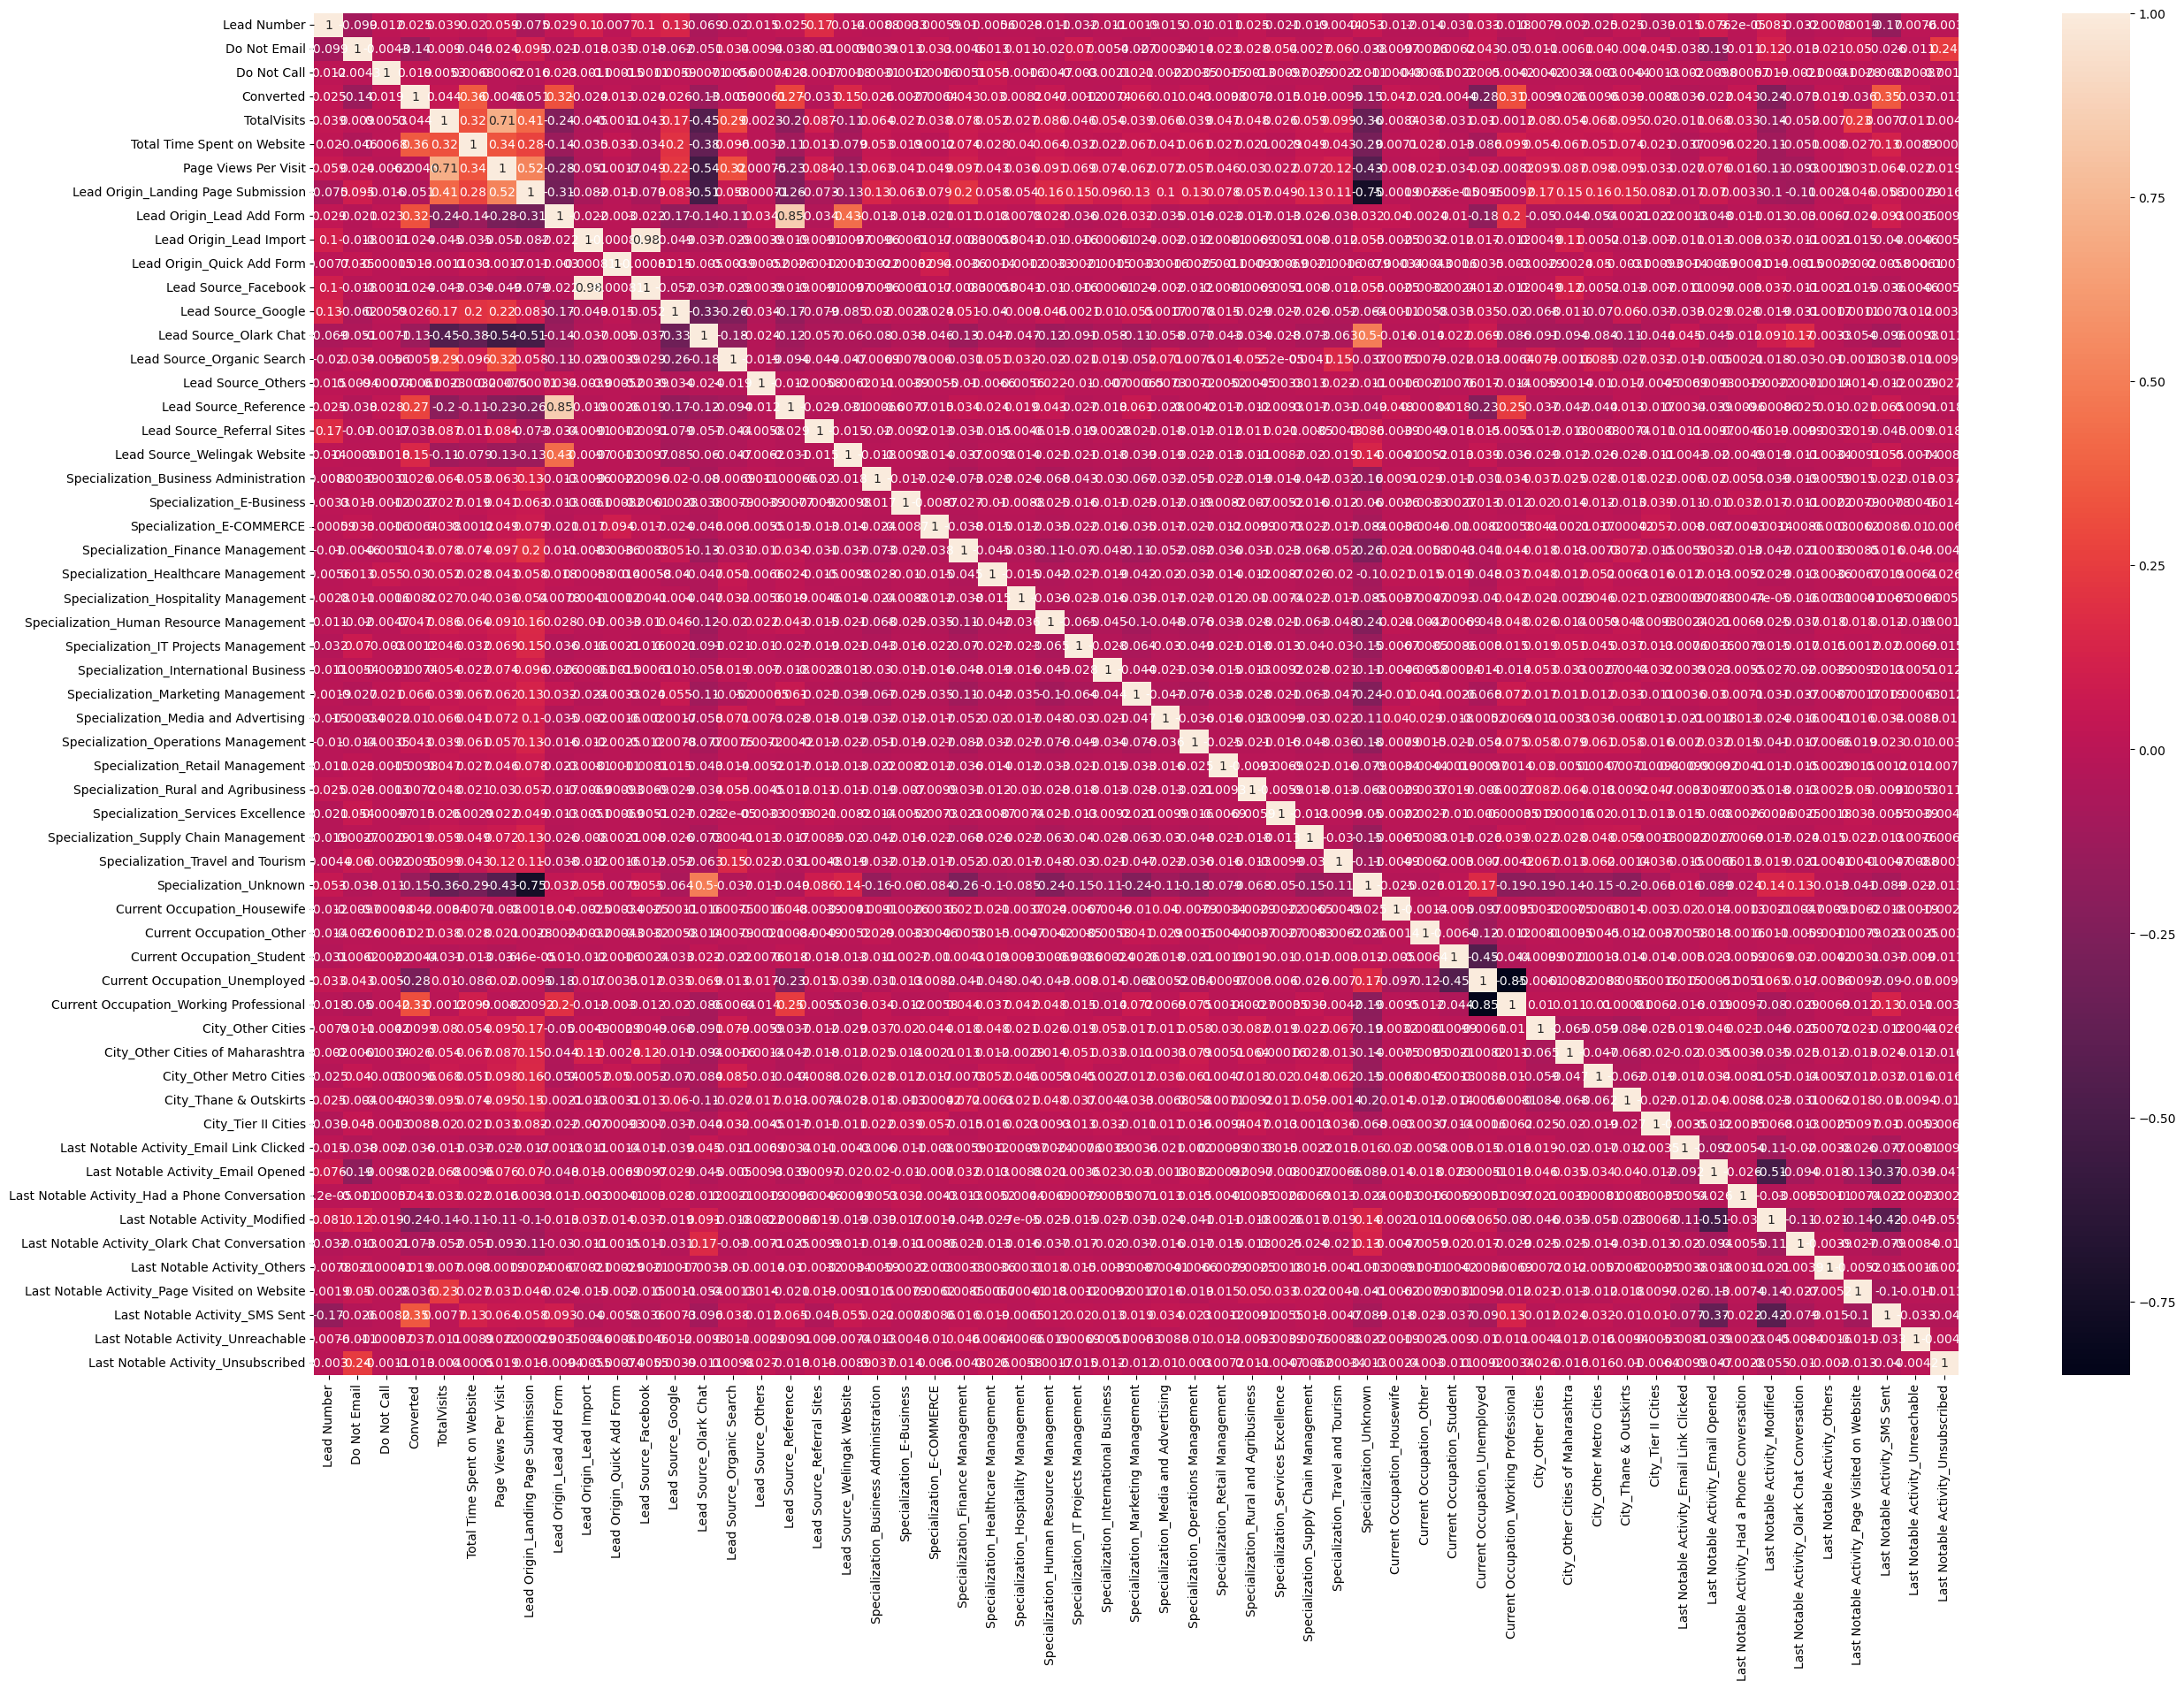

In [99]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(),annot = True)
plt.show()

### 5. Feature Scaling

In [100]:
# Importing the required library for MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [101]:
# Listing out the numerical columns for scaling
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [102]:
# Scaling the numerical columns using MinMax scaler
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0     0.000000                     0.000000   
6795             0            0     0.235294                     0.214349   
3516             0            0     0.294118                     0.046655   
8105             0            0     0.294118                     0.541373   
3934             0            0     0.000000                     0.000000   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
1871              0.000000                                    0   
6795              0.147778                                    1   
3516              0.277778                                    0   
8105              0.555556                                    1   
3934              0.000000                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
1871                           0                     0  ...   
6795                           0                     0  ...   
3516                           0                     0  ...   
8105                           0                     0  ...   
3934                           0                     0  ...   

      Last Notable Activity_Email Link Clicked  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      Last Notable Activity_Email Opened  \
1871                                   1   
6795                                   1   
3516                                   1   
8105                                   0   
3934                                   0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Others  \
1871                             0   
6795                             0   
3516                             0   
8105                             0   
3934                             0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                             

## VI) Model Building

In [103]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Defining a user defined function to build a logistic regression using StatsModels, which returns the StatsModels summary
def build_LogReg_model_sm(df1):
    X_train_sm = sm.add_constant(df1)
    logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    return logm1.fit().summary()

In [105]:
# Defining a function for VIF calculation of the model
def VIF_calc(df2):
    vif = pd.DataFrame()
    vif['Features'] = df2.columns
    vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model-1

Lets build the first logistic regression model before dropping any feature variable, to assess how good of a starting point we have.

In [106]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.9
Date:                Tue, 15 Aug 2023   Deviance:                       5261.7
Time:                        17:09:32   Pearson chi2:                 7.12e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4030
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2630      1.222     -1.034      0.301      -3.658       1.132
Do Not Email                                      -1.2922      0.196     -6.597      0.000      -1.676      -0.908
Do Not Call                                       21.0492   3.38e+04      0.001      1.000   -6.62e+04    6.62e+04
TotalVisits                                        1.4313      0.259      5.519      0.000       0.923       1.940
Total Time Spent on Website                        4.5170      0.168     26.915      0.000       4.188       4.846
Page Views Per Visit                              -1.0310      0.258     -3.999      0.000      -1.536      -0.526
Lead Origin_Landing Page Submission               -0.9434      0.138     -6.853      0.000      -1.213      -0.674
Lead Origin_Lead Add Form                          2.9297      0.504      5.818      0.000       1.943       3.917
Lead Origin_Lead Import                            0.7028      1.879      0.374      0.708      -2.980       4.385
Lead Origin_Quick Add Form                        20.8034   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                              -0.4576      1.879     -0.244      0.808      -4.140       3.225
Lead Source_Google                                 0.3672      0.098      3.761      0.000       0.176       0.558
Lead Source_Olark Chat                             1.1864      0.155      7.639      0.000       0.882       1.491
Lead Source_Organic Search                         0.1444      0.131      1.098      0.272      -0.113       0.402
Lead Source_Others                                 0.4815      0.634      0.760      0.447      -0.760       1.723
Lead Source_Reference                              0.7275      0.542      1.343      0.179      -0.335       1.790
Lead Source_Referral Sites                         0.0892      0.319      0.280      0.779      -0.535       0.714
Lead Source_Welingak Website                       3.2299      0.881      3.667      0.000       1.504       4.956
Specialization_Business Administration            -0.2647      0.247     -1.073      0.283      -0.748       0.219
Specialization_E-Business                         -0.1062      0.522     -0.203      0.839      -1.129       0.917
Specialization_E-COMMERCE                          0.1417      0.350      0.404      0.686      -0.545       0.828
Specialization_Finance Management                 -0.0145      0.211     -0.069      0.945      -0.428       0.399
Specialization_Healthcare Management              -0.1112      0.335     -0.331      0.740      -0.768       0.546
Specialization_Hospitality Management             -1.1854      0.378     -3.133      0.002   

In [107]:
# Building the first model
build_LogReg_model_sm(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.9
Date:                Tue, 15 Aug 2023   Deviance:                       5261.7
Time:                        17:09:32   Pearson chi2:                 7.12e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4030
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2630      1.222     -1.034      0.301      -3.658       1.132
Do Not Email                                      -1.2922      0.196     -6.597      0.000      -1.676      -0.908
Do Not Call                                       21.0492   3.38e+04      0.001      1.000   -6.62e+04    6.62e+04
TotalVisits                                        1.4313      0.259      5.519      0.000       0.923       1.940
Total Time Spent on Website                        4.5170      0.168     26.915      0.000       4.188       4.846
Page Views Per Visit                              -1.0310      0.258     -3.999      0.000      -1.536      -0.526
Lead Origin_Landing Page Submission               -0.9434      0.138     -6.853      0.000      -1.213      -0.674
Lead Origin_Lead Add Form                          2.9297      0.504      5.818      0.000       1.943       3.917
Lead Origin_Lead Import                            0.7028      1.879      0.374      0.708      -2.980       4.385
Lead Origin_Quick Add Form                        20.8034   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                              -0.4576      1.879     -0.244      0.808      -4.140       3.225
Lead Source_Google                                 0.3672      0.098      3.761      0.000       0.176       0.558
Lead Source_Olark Chat                             1.1864      0.155      7.639      0.000       0.882       1.491
Lead Source_Organic Search                         0.1444      0.131      1.098      0.272      -0.113       0.402
Lead Source_Others                                 0.4815      0.634      0.760      0.447      -0.760       1.723
Lead Source_Reference                              0.7275      0.542      1.343      0.179      -0.335       1.790
Lead Source_Referral Sites                         0.0892      0.319      0.280      0.779      -0.535       0.714
Lead Source_Welingak Website                       3.2299      0.881      3.667      0.000       1.504       4.956
Specialization_Business Administration            -0.2647      0.247     -1.073      0.283      -0.748       0.219
Specialization_E-Business                         -0.1062      0.522     -0.203      0.839      -1.129       0.917
Specialization_E-COMMERCE                          0.1417      0.350      0.404      0.686      -0.545       0.828
Specialization_Finance Management                 -0.0145      0.211     -0.069      0.945      -0.428       0.399
Specialization_Healthcare Management              -0.1112      0.335     -0.331      0.740      -0.768       0.546
Specialization_Hospitality Management             -1.1854      0.378     -3.133      0.002   

In [108]:
# Checking the VIF values
VIF_calc(X_train)

Features     VIF
38                   Current Occupation_Unemployed  172.20
48                  Last Notable Activity_Modified   56.86
46              Last Notable Activity_Email Opened   48.54
52                  Last Notable Activity_SMS Sent   37.69
6                        Lead Origin_Lead Add Form   17.01
9                             Lead Source_Facebook   16.91
7                          Lead Origin_Lead Import   16.90
39         Current Occupation_Working Professional   15.68
34                          Specialization_Unknown   14.49
14                           Lead Source_Reference   14.08
5              Lead Origin_Landing Page Submission    8.52
4                             Page Views Per Visit    6.56
51   Last Notable Activity_Page Visited on Website    6.51
37                      Current Occupation_Student    5.06
2                                      TotalVisits    4.63
16                    Lead Source_Welingak Website    4.01
20               Specialization_Finance Management    3.98
49   Last Notable Activity_Olark Chat Conversation    3.90
45        Last Notable Activity_Email Link Clicked    3.87
11                          Lead Source_Olark Chat    3.67
26             Specialization_Marketing Management    3.63
23        Specialization_Human Resource Management    3.58
10                              Lead Source_Google    2.70
28            Specialization_Operations Management    2.63
3                      Total Time Spent on Website    2.30
17          Specialization_Business Administration    2.23
32          Specialization_Supply Chain Management    2.06
24           Specialization_IT Projects Management    2.06
12                      Lead Source_Organic Search    1.80
54              Last Notable Activity_Unsubscribed    1.70
33               Specialization_Travel and Tourism    1.64
27            Specialization_Media and Advertising    1.60
25           Specialization_International Business    1.53
21            Specialization_Healthcare Management    1.46
53               Last Notable Activity_Unreachable    1.46
22           Specialization_Hospitality Management    1.39
19                       Specialization_E-COMMERCE    1.39
0                                     Do Not Email    1.35
29                Specialization_Retail Management    1.31
35                    Current Occupation_Housewife    1.28
47  Last Notable Activity_Had a Phone Conversation    1.27
36                        Current Occupation_Other    1.24
40                               City_Other Cities    1.23
30           Specialization_Rural and Agribusiness    1.23
43                          City_Thane & Outskirts    1.20
18                       Specialization_E-Business    1.17
41                City_Other Cities of Maharashtra    1.16
42                         City_Other Metro Cities    1.15
15                      Lead Source_Referral Sites    1.15
31              Specialization_Services Excellence    1.15
50                    Last Notable Activity_Others    1.09
13                              Lead Source_Others    1.06
44                             City_Tier II Cities    1.04
8                       Lead Origin_Quick Add Form    1.02
1                                      Do Not Call    1.01

Observations: <br>
1. There are lot of insignificant variables with p-value > 0.05. <br>
2. There is high multi-collinearity  among the predictor variables, as the VIF values are quite high.

### Model-2 (Using RFE)

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [110]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=35) # running RFE with 35 variables as output
rfe = rfe.fit(X_train, y_train)

In [111]:
# Checking the status of variable selection
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [112]:
# Creating a list of variable along with its RFE selection status
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_E-Business', False, 18),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 14),
 ('Specialization_Healthcare Management', False, 20),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 3),

In [113]:
# Variable to store the list of selected columns
col = X_train.columns[rfe.support_]

In [114]:
# Checking the dropped columns
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

In [115]:
# Creating X_train dataframe with RFE selected variables
X_train_2_rfe = X_train[col]

In [116]:
# Building the first model
build_LogReg_model_sm(X_train_2_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.9
Date:                Tue, 15 Aug 2023   Deviance:                       5269.9
Time:                        17:09:36   Pearson chi2:                 7.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.3200      1.208     -1.093      0.274      -3.687       1.047
Do Not Email                                      -1.2705      0.195     -6.514      0.000      -1.653      -0.888
Do Not Call                                       21.0078   3.36e+04      0.001      1.000   -6.59e+04    6.59e+04
TotalVisits                                        1.4534      0.257      5.655      0.000       0.950       1.957
Total Time Spent on Website                        4.4973      0.167     26.947      0.000       4.170       4.824
Page Views Per Visit                              -0.9672      0.251     -3.853      0.000      -1.459      -0.475
Lead Origin_Landing Page Submission               -0.9708      0.132     -7.372      0.000      -1.229      -0.713
Lead Origin_Lead Add Form                          2.9199      0.502      5.812      0.000       1.935       3.905
Lead Origin_Quick Add Form                        20.9365   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                 0.2928      0.082      3.552      0.000       0.131       0.454
Lead Source_Olark Chat                             1.1096      0.143      7.735      0.000       0.828       1.391
Lead Source_Others                                 0.3695      0.629      0.588      0.557      -0.862       1.602
Lead Source_Reference                              0.6488      0.539      1.204      0.229      -0.407       1.705
Lead Source_Welingak Website                       3.1614      0.879      3.597      0.000       1.439       4.884
Specialization_E-COMMERCE                          0.2660      0.301      0.884      0.377      -0.324       0.856
Specialization_Hospitality Management             -1.0447      0.334     -3.131      0.002      -1.699      -0.391
Specialization_International Business             -0.4563      0.255     -1.788      0.074      -0.956       0.044
Specialization_Retail Management                  -0.5212      0.336     -1.551      0.121      -1.180       0.137
Specialization_Rural and Agribusiness              0.5419      0.403      1.345      0.179      -0.248       1.332
Specialization_Unknown                            -1.1352      0.125     -9.054      0.000      -1.381      -0.889
Current Occupation_Housewife                      23.2953   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
Current Occupation_Other                           0.0735      1.369      0.054      0.957      -2.610       2.757
Current Occupation_Student                         0.6640      1.117      0.595      0.552      -1.525       2.853
Current Occupation_Unemployed                      0.3051      1.091      0.280      0.780   

We still have very high P-values well over the limit, so we will do one more round of RFE and eliminate another 10 variables.

### Model-3 (Using RFE)

In [117]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=25) # running RFE with 25 variables as output
rfe = rfe.fit(X_train_2_rfe, y_train)

In [118]:
# List of all variables along with details on whether they are selected or not
list(zip(X_train_2_rfe.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Quick Add Form', False, 11),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_International Business', False, 2),
 ('Specialization_Retail Management', True, 1),
 ('Specialization_Rural and Agribusiness', False, 3),
 ('Specialization_Unknown', True, 1),
 ('Current Occupation_Housewife', True, 1),
 ('Current Occupation_Other', True, 1),
 ('Current Occupation_Student', True, 1),
 ('Current Occupation_Unemployed', True, 1),
 ('Current Occupation_Working Professional', True, 1

In [119]:
# Variable to store the list of selected columns
col = X_train_2_rfe.columns[rfe.support_]

In [120]:
# Checking the dropped columns
X_train_2_rfe.columns[~rfe.support_]

Index(['Do Not Call', 'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Rural and Agribusiness', 'City_Tier II Cities',
       'Last Notable Activity_Email Opened'],
      dtype='object')

In [121]:
# Creating X_train dataframe with RFE selected variables
X_train_3_rfe = X_train[col]

In [122]:
# Building the model
build_LogReg_model_sm(X_train_3_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.4
Date:                Tue, 15 Aug 2023   Deviance:                       5290.7
Time:                        17:09:36   Pearson chi2:                 7.16e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5131      1.116     -1.355      0.175      -3.701       0.675
Do Not Email                                      -1.2553      0.179     -7.021      0.000      -1.606      -0.905
TotalVisits                                        1.4373      0.255      5.626      0.000       0.937       1.938
Total Time Spent on Website                        4.5182      0.166     27.196      0.000       4.193       4.844
Page Views Per Visit                              -0.9868      0.250     -3.947      0.000      -1.477      -0.497
Lead Origin_Landing Page Submission               -1.0662      0.129     -8.283      0.000      -1.319      -0.814
Lead Origin_Lead Add Form                          3.3253      0.214     15.529      0.000       2.906       3.745
Lead Source_Olark Chat                             0.9188      0.133      6.922      0.000       0.659       1.179
Lead Source_Welingak Website                       2.5787      0.750      3.440      0.001       1.110       4.048
Specialization_Hospitality Management             -1.0466      0.332     -3.151      0.002      -1.698      -0.396
Specialization_Retail Management                  -0.4988      0.336     -1.485      0.138      -1.157       0.160
Specialization_Unknown                            -1.1555      0.124     -9.327      0.000      -1.398      -0.913
Current Occupation_Housewife                      23.3438   1.33e+04      0.002      0.999    -2.6e+04    2.61e+04
Current Occupation_Other                          -0.0040      1.382     -0.003      0.998      -2.713       2.705
Current Occupation_Student                         0.7037      1.136      0.620      0.536      -1.523       2.930
Current Occupation_Unemployed                      0.3365      1.111      0.303      0.762      -1.841       2.514
Current Occupation_Working Professional            2.9807      1.126      2.647      0.008       0.774       5.188
Last Notable Activity_Email Link Clicked          -0.5192      0.276     -1.879      0.060      -1.061       0.022
Last Notable Activity_Had a Phone Conversation     3.1505      1.127      2.795      0.005       0.941       5.360
Last Notable Activity_Modified                    -0.7004      0.088     -7.999      0.000      -0.872      -0.529
Last Notable Activity_Olark Chat Conversation     -1.3012      0.347     -3.754      0.000      -1.981      -0.622
Last Notable Activity_Others                       1.7861      1.302      1.371      0.170      -0.767       4.339
Last Notable Activity_Page Visited on Website     -0.6102      0.203     -3.006      0.003      -1.008      -0.212
Last Notable Activity_SMS Sent                     1.4092      0.089     15.862      0.000   

We still have very high P-values well over the limit, so we will do one more round of RFE and eliminate another 5 variables.

### Model-4 (Using RFE)

In [123]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20) # running RFE with 25 variables as output
rfe = rfe.fit(X_train_3_rfe, y_train)

In [124]:
# List of all variables along with details on whether they are selected or not
list(zip(X_train_3_rfe.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Retail Management', False, 6),
 ('Specialization_Unknown', True, 1),
 ('Current Occupation_Housewife', True, 1),
 ('Current Occupation_Other', False, 3),
 ('Current Occupation_Student', False, 4),
 ('Current Occupation_Unemployed', False, 2),
 ('Current Occupation_Working Professional', True, 1),
 ('Last Notable Activity_Email Link Clicked', False, 5),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_Others', True, 1),
 ('Last Notable Activity_Page Visited on Website', Tr

In [125]:
# Variable to store the list of selected columns
col = X_train_3_rfe.columns[rfe.support_]

In [126]:
# Checking the dropped columns
X_train_3_rfe.columns[~rfe.support_]

Index(['Specialization_Retail Management', 'Current Occupation_Other',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Last Notable Activity_Email Link Clicked'],
      dtype='object')

In [127]:
# Creating X_train dataframe with RFE selected variables
X_train_4_rfe = X_train[col]

In [128]:
# Building the model
build_LogReg_model_sm(X_train_4_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.7
Date:                Tue, 15 Aug 2023   Deviance:                       5299.3
Time:                        17:09:37   Pearson chi2:                 7.21e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3995
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1940      0.157     -7.620      0.000      -1.501      -0.887
Do Not Email                                      -1.2636      0.179     -7.074      0.000      -1.614      -0.914
TotalVisits                                        1.4271      0.255      5.607      0.000       0.928       1.926
Total Time Spent on Website                        4.5143      0.166     27.238      0.000       4.189       4.839
Page Views Per Visit                              -0.9856      0.250     -3.946      0.000      -1.475      -0.496
Lead Origin_Landing Page Submission               -1.0675      0.129     -8.307      0.000      -1.319      -0.816
Lead Origin_Lead Add Form                          3.3182      0.214     15.528      0.000       2.899       3.737
Lead Source_Olark Chat                             0.9116      0.133      6.880      0.000       0.652       1.171
Lead Source_Welingak Website                       2.5666      0.750      3.424      0.001       1.097       4.036
Specialization_Hospitality Management             -1.0262      0.332     -3.094      0.002      -1.676      -0.376
Specialization_Unknown                            -1.1507      0.124     -9.309      0.000      -1.393      -0.908
Current Occupation_Housewife                      23.0005   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Current Occupation_Working Professional            2.6340      0.193     13.676      0.000       2.256       3.011
Last Notable Activity_Had a Phone Conversation     3.1725      1.127      2.815      0.005       0.963       5.382
Last Notable Activity_Modified                    -0.6787      0.087     -7.841      0.000      -0.848      -0.509
Last Notable Activity_Olark Chat Conversation     -1.2725      0.346     -3.674      0.000      -1.951      -0.594
Last Notable Activity_Others                       1.8085      1.301      1.390      0.165      -0.742       4.359
Last Notable Activity_Page Visited on Website     -0.5839      0.202     -2.888      0.004      -0.980      -0.188
Last Notable Activity_SMS Sent                     1.4282      0.088     16.274      0.000       1.256       1.600
Last Notable Activity_Unreachable                  1.5080      0.520      2.903      0.004       0.490       2.526
Last Notable Activity_Unsubscribed                 0.7955      0.528      1.507      0.132      -0.239       1.830
==================================================================================================================
"""

This is better than the previous model, but still there are many insignificant variables with high p-value. Now, we have eliminated more than50% of the variables using multiple rounds of RFE. Hence, as of now, we stand with 20 variables. Subsequent elimination of insignificant feature variables will be done by manual feature elimination.

### Model-5

Current Occupation_Housewife has a very high P-value, hence we will drop this variable and build the model.

In [129]:
X_train_5 = X_train_4_rfe.drop(['Current Occupation_Housewife'], axis = 1)

In [130]:
# Building the model
build_LogReg_model_sm(X_train_5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.2
Date:                Tue, 15 Aug 2023   Deviance:                       5314.5
Time:                        17:09:37   Pearson chi2:                 7.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3981
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1824      0.156     -7.556      0.000      -1.489      -0.876
Do Not Email                                      -1.2695      0.179     -7.110      0.000      -1.619      -0.920
TotalVisits                                        1.4129      0.254      5.556      0.000       0.914       1.911
Total Time Spent on Website                        4.5101      0.166     27.251      0.000       4.186       4.835
Page Views Per Visit                              -0.9913      0.250     -3.973      0.000      -1.480      -0.502
Lead Origin_Landing Page Submission               -1.0616      0.128     -8.269      0.000      -1.313      -0.810
Lead Origin_Lead Add Form                          3.3265      0.213     15.591      0.000       2.908       3.745
Lead Source_Olark Chat                             0.9061      0.132      6.846      0.000       0.647       1.166
Lead Source_Welingak Website                       2.5535      0.750      3.407      0.001       1.084       4.023
Specialization_Hospitality Management             -1.0331      0.331     -3.117      0.002      -1.683      -0.383
Specialization_Unknown                            -1.1558      0.124     -9.357      0.000      -1.398      -0.914
Current Occupation_Working Professional            2.6256      0.193     13.638      0.000       2.248       3.003
Last Notable Activity_Had a Phone Conversation     3.1635      1.127      2.807      0.005       0.955       5.372
Last Notable Activity_Modified                    -0.6768      0.086     -7.837      0.000      -0.846      -0.508
Last Notable Activity_Olark Chat Conversation     -1.2737      0.346     -3.678      0.000      -1.952      -0.595
Last Notable Activity_Others                       1.8021      1.301      1.386      0.166      -0.747       4.351
Last Notable Activity_Page Visited on Website     -0.5871      0.202     -2.905      0.004      -0.983      -0.191
Last Notable Activity_SMS Sent                     1.4212      0.088     16.212      0.000       1.249       1.593
Last Notable Activity_Unreachable                  1.5012      0.519      2.890      0.004       0.483       2.519
Last Notable Activity_Unsubscribed                 0.7944      0.528      1.505      0.132      -0.240       1.829
==================================================================================================================
"""

'Last Notable Activity_Others' has the highest p-value, hence we will drop it and build the next model.

### Model-6

In [131]:
X_train_6 = X_train_5.drop(['Last Notable Activity_Others'], axis = 1)

In [132]:
# Building the model
build_LogReg_model_sm(X_train_6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.3
Date:                Tue, 15 Aug 2023   Deviance:                       5316.5
Time:                        17:09:37   Pearson chi2:                 7.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3979
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1806      0.156     -7.545      0.000      -1.487      -0.874
Do Not Email                                      -1.2611      0.178     -7.093      0.000      -1.610      -0.913
TotalVisits                                        1.4152      0.254      5.567      0.000       0.917       1.913
Total Time Spent on Website                        4.5120      0.165     27.272      0.000       4.188       4.836
Page Views Per Visit                              -0.9964      0.249     -3.994      0.000      -1.485      -0.507
Lead Origin_Landing Page Submission               -1.0593      0.128     -8.251      0.000      -1.311      -0.808
Lead Origin_Lead Add Form                          3.3262      0.213     15.591      0.000       2.908       3.744
Lead Source_Olark Chat                             0.9082      0.132      6.862      0.000       0.649       1.168
Lead Source_Welingak Website                       2.5523      0.749      3.406      0.001       1.083       4.021
Specialization_Hospitality Management             -1.0341      0.331     -3.120      0.002      -1.684      -0.385
Specialization_Unknown                            -1.1547      0.124     -9.349      0.000      -1.397      -0.913
Current Occupation_Working Professional            2.6277      0.192     13.656      0.000       2.251       3.005
Last Notable Activity_Had a Phone Conversation     3.1607      1.127      2.805      0.005       0.952       5.369
Last Notable Activity_Modified                    -0.6808      0.086     -7.891      0.000      -0.850      -0.512
Last Notable Activity_Olark Chat Conversation     -1.2783      0.346     -3.692      0.000      -1.957      -0.600
Last Notable Activity_Page Visited on Website     -0.5918      0.202     -2.929      0.003      -0.988      -0.196
Last Notable Activity_SMS Sent                     1.4174      0.088     16.180      0.000       1.246       1.589
Last Notable Activity_Unreachable                  1.4981      0.519      2.884      0.004       0.480       2.516
Last Notable Activity_Unsubscribed                 0.7826      0.527      1.484      0.138      -0.251       1.816
==================================================================================================================
"""

'Last Notable Activity_Unsubscribed' has the highest p-value, hence we will drop it and build the next model.

### Model-7

In [133]:
X_train_7 = X_train_6.drop(['Last Notable Activity_Unsubscribed'], axis = 1)

In [134]:
# Building the model
build_LogReg_model_sm(X_train_7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.3
Date:                Tue, 15 Aug 2023   Deviance:                       5318.6
Time:                        17:09:37   Pearson chi2:                 7.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1710      0.156     -7.493      0.000      -1.477      -0.865
Do Not Email                                      -1.1844      0.168     -7.068      0.000      -1.513      -0.856
TotalVisits                                        1.4091      0.254      5.548      0.000       0.911       1.907
Total Time Spent on Website                        4.5115      0.165     27.275      0.000       4.187       4.836
Page Views Per Visit                              -0.9941      0.249     -3.988      0.000      -1.483      -0.506
Lead Origin_Landing Page Submission               -1.0625      0.128     -8.278      0.000      -1.314      -0.811
Lead Origin_Lead Add Form                          3.3265      0.213     15.586      0.000       2.908       3.745
Lead Source_Olark Chat                             0.9078      0.132      6.859      0.000       0.648       1.167
Lead Source_Welingak Website                       2.5379      0.749      3.389      0.001       1.070       4.006
Specialization_Hospitality Management             -1.0195      0.330     -3.089      0.002      -1.666      -0.373
Specialization_Unknown                            -1.1555      0.124     -9.355      0.000      -1.398      -0.913
Current Occupation_Working Professional            2.6322      0.193     13.672      0.000       2.255       3.010
Last Notable Activity_Had a Phone Conversation     3.1552      1.127      2.800      0.005       0.947       5.364
Last Notable Activity_Modified                    -0.6928      0.086     -8.067      0.000      -0.861      -0.524
Last Notable Activity_Olark Chat Conversation     -1.2866      0.346     -3.717      0.000      -1.965      -0.608
Last Notable Activity_Page Visited on Website     -0.6025      0.202     -2.986      0.003      -0.998      -0.207
Last Notable Activity_SMS Sent                     1.4066      0.087     16.128      0.000       1.236       1.578
Last Notable Activity_Unreachable                  1.4894      0.519      2.870      0.004       0.472       2.506
==================================================================================================================
"""

p-values for all feature variables are now under the acceptable limit of 0.05, hence now we will focus on eliminating multicollinearity by eliminating variables with high VIF values.

### Model-8

In [135]:
# Checking the VIF values of Model-7
VIF_calc(X_train_7)

Features   VIF
3                             Page Views Per Visit  5.77
1                                      TotalVisits  4.44
4              Lead Origin_Landing Page Submission  3.69
9                           Specialization_Unknown  2.64
2                      Total Time Spent on Website  2.10
12                  Last Notable Activity_Modified  2.04
6                           Lead Source_Olark Chat  1.94
15                  Last Notable Activity_SMS Sent  1.71
5                        Lead Origin_Lead Add Form  1.48
7                     Lead Source_Welingak Website  1.27
10         Current Occupation_Working Professional  1.21
14   Last Notable Activity_Page Visited on Website  1.20
0                                     Do Not Email  1.13
13   Last Notable Activity_Olark Chat Conversation  1.09
8            Specialization_Hospitality Management  1.02
11  Last Notable Activity_Had a Phone Conversation  1.01
16               Last Notable Activity_Unreachable  1.01

'Page Views Per Visit' has high VIF, hence we will drop this variable and build the model.

In [136]:
X_train_8 = X_train_7.drop(['Page Views Per Visit'], axis = 1)

In [137]:
# Building the model
build_LogReg_model_sm(X_train_8)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.3
Date:                Tue, 15 Aug 2023   Deviance:                       5334.7
Time:                        17:09:37   Pearson chi2:                 7.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3962
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.3489      0.150     -8.992      0.000      -1.643      -1.055
Do Not Email                                      -1.1835      0.167     -7.072      0.000      -1.511      -0.856
TotalVisits                                        0.8786      0.217      4.051      0.000       0.454       1.304
Total Time Spent on Website                        4.4948      0.165     27.215      0.000       4.171       4.819
Lead Origin_Landing Page Submission               -1.1026      0.128     -8.634      0.000      -1.353      -0.852
Lead Origin_Lead Add Form                          3.4721      0.211     16.483      0.000       3.059       3.885
Lead Source_Olark Chat                             1.0572      0.127      8.307      0.000       0.808       1.307
Lead Source_Welingak Website                       2.5332      0.749      3.382      0.001       1.065       4.001
Specialization_Hospitality Management             -1.0493      0.331     -3.168      0.002      -1.698      -0.400
Specialization_Unknown                            -1.1301      0.123     -9.187      0.000      -1.371      -0.889
Current Occupation_Working Professional            2.6282      0.193     13.649      0.000       2.251       3.006
Last Notable Activity_Had a Phone Conversation     3.1434      1.113      2.825      0.005       0.963       5.324
Last Notable Activity_Modified                    -0.6869      0.086     -8.011      0.000      -0.855      -0.519
Last Notable Activity_Olark Chat Conversation     -1.2558      0.345     -3.644      0.000      -1.931      -0.580
Last Notable Activity_Page Visited on Website     -0.4574      0.197     -2.323      0.020      -0.843      -0.071
Last Notable Activity_SMS Sent                     1.3869      0.087     15.974      0.000       1.217       1.557
Last Notable Activity_Unreachable                  1.4610      0.520      2.808      0.005       0.441       2.481
==================================================================================================================
"""

In [138]:
# Checking the VIF values of Model-8
VIF_calc(X_train_8)

Features   VIF
3              Lead Origin_Landing Page Submission  3.06
1                                      TotalVisits  2.73
8                           Specialization_Unknown  2.53
2                      Total Time Spent on Website  2.08
11                  Last Notable Activity_Modified  2.03
5                           Lead Source_Olark Chat  1.88
14                  Last Notable Activity_SMS Sent  1.70
4                        Lead Origin_Lead Add Form  1.47
6                     Lead Source_Welingak Website  1.27
9          Current Occupation_Working Professional  1.21
13   Last Notable Activity_Page Visited on Website  1.17
0                                     Do Not Email  1.13
12   Last Notable Activity_Olark Chat Conversation  1.09
7            Specialization_Hospitality Management  1.02
10  Last Notable Activity_Had a Phone Conversation  1.01
15               Last Notable Activity_Unreachable  1.01

VIF values are all below the acceptable upper limit. However, we can now notice that the p-value of the variable 'Last Notable Activity_Page Visited on Website' has increased to 0.02. Though not alarmingly high, this is still on the higher side, so we will drop this variable and observe the effect on the model.

### Model-9

In [139]:
X_train_9 = X_train_8.drop(['Last Notable Activity_Page Visited on Website'], axis = 1)

In [140]:
# Building the model
build_LogReg_model_sm(X_train_9)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.1
Date:                Tue, 15 Aug 2023   Deviance:                       5340.3
Time:                        17:09:38   Pearson chi2:                 7.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3957
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.3493      0.150     -9.002      0.000      -1.643      -1.056
Do Not Email                                      -1.2030      0.167     -7.212      0.000      -1.530      -0.876
TotalVisits                                        0.7488      0.209      3.576      0.000       0.338       1.159
Total Time Spent on Website                        4.4910      0.165     27.223      0.000       4.168       4.814
Lead Origin_Landing Page Submission               -1.1042      0.128     -8.654      0.000      -1.354      -0.854
Lead Origin_Lead Add Form                          3.4536      0.210     16.416      0.000       3.041       3.866
Lead Source_Olark Chat                             1.0367      0.127      8.175      0.000       0.788       1.285
Lead Source_Welingak Website                       2.5335      0.749      3.383      0.001       1.065       4.001
Specialization_Hospitality Management             -1.0449      0.332     -3.146      0.002      -1.696      -0.394
Specialization_Unknown                            -1.1394      0.123     -9.274      0.000      -1.380      -0.899
Current Occupation_Working Professional            2.6244      0.192     13.649      0.000       2.248       3.001
Last Notable Activity_Had a Phone Conversation     3.1937      1.111      2.875      0.004       1.016       5.371
Last Notable Activity_Modified                    -0.6503      0.084     -7.704      0.000      -0.816      -0.485
Last Notable Activity_Olark Chat Conversation     -1.2107      0.343     -3.527      0.000      -1.884      -0.538
Last Notable Activity_SMS Sent                     1.4237      0.086     16.644      0.000       1.256       1.591
Last Notable Activity_Unreachable                  1.5036      0.520      2.891      0.004       0.484       2.523
==================================================================================================================
"""

In [141]:
# Checking the VIF values
VIF_calc(X_train_9)

Features   VIF
3              Lead Origin_Landing Page Submission  3.06
1                                      TotalVisits  2.55
8                           Specialization_Unknown  2.52
2                      Total Time Spent on Website  2.08
11                  Last Notable Activity_Modified  1.94
5                           Lead Source_Olark Chat  1.87
13                  Last Notable Activity_SMS Sent  1.64
4                        Lead Origin_Lead Add Form  1.46
6                     Lead Source_Welingak Website  1.27
9          Current Occupation_Working Professional  1.21
0                                     Do Not Email  1.12
12   Last Notable Activity_Olark Chat Conversation  1.09
7            Specialization_Hospitality Management  1.02
10  Last Notable Activity_Had a Phone Conversation  1.01
14               Last Notable Activity_Unreachable  1.01

With this model, we can observe that all the p-values and the VIFs are in the acceptable range. However, the count of the feature variables is still a bit high, and this will make the model complex. Hence, we will try to drop one or two variables which have comparatively higher p-values and observe the effect on the model.<br><br>
In this model, 'Last Notable Activity_Unreachable' and 'Last Notable Activity_Had a Phone Conversation' have higher p-values (0.004) than the rest. Since 'Last Notable Activity_Unreachable' has the lower coefficient value among the two, we will drop it first and see the effect.

### Model-10

In [142]:
X_train_10 = X_train_9.drop(['Last Notable Activity_Unreachable'], axis = 1)

In [143]:
# Building the model
build_LogReg_model_sm(X_train_10)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.3
Date:                Tue, 15 Aug 2023   Deviance:                       5348.6
Time:                        17:09:38   Pearson chi2:                 7.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.3219      0.149     -8.846      0.000      -1.615      -1.029
Do Not Email                                      -1.2044      0.167     -7.220      0.000      -1.531      -0.877
TotalVisits                                        0.7511      0.209      3.590      0.000       0.341       1.161
Total Time Spent on Website                        4.4766      0.165     27.194      0.000       4.154       4.799
Lead Origin_Landing Page Submission               -1.1124      0.128     -8.722      0.000      -1.362      -0.862
Lead Origin_Lead Add Form                          3.4442      0.210     16.382      0.000       3.032       3.856
Lead Source_Olark Chat                             1.0299      0.127      8.131      0.000       0.782       1.278
Lead Source_Welingak Website                       2.5341      0.749      3.383      0.001       1.066       4.002
Specialization_Hospitality Management             -1.0505      0.332     -3.164      0.002      -1.701      -0.400
Specialization_Unknown                            -1.1479      0.123     -9.349      0.000      -1.389      -0.907
Current Occupation_Working Professional            2.6244      0.192     13.653      0.000       2.248       3.001
Last Notable Activity_Had a Phone Conversation     3.1744      1.111      2.857      0.004       0.997       5.352
Last Notable Activity_Modified                    -0.6646      0.084     -7.894      0.000      -0.830      -0.500
Last Notable Activity_Olark Chat Conversation     -1.2233      0.343     -3.565      0.000      -1.896      -0.551
Last Notable Activity_SMS Sent                     1.4085      0.085     16.519      0.000       1.241       1.576
==================================================================================================================
"""

In [144]:
# Checking the VIF values
VIF_calc(X_train_10)

Features   VIF
3              Lead Origin_Landing Page Submission  3.05
1                                      TotalVisits  2.55
8                           Specialization_Unknown  2.52
2                      Total Time Spent on Website  2.08
11                  Last Notable Activity_Modified  1.94
5                           Lead Source_Olark Chat  1.87
13                  Last Notable Activity_SMS Sent  1.64
4                        Lead Origin_Lead Add Form  1.46
6                     Lead Source_Welingak Website  1.27
9          Current Occupation_Working Professional  1.21
0                                     Do Not Email  1.12
12   Last Notable Activity_Olark Chat Conversation  1.09
7            Specialization_Hospitality Management  1.02
10  Last Notable Activity_Had a Phone Conversation  1.01

Next, we will drop 'Last Notable Activity_Had a Phone Conversation' since it has comparatively higher p-value, to reduce the variable count, and build the next model.

### Model-11

In [145]:
X_train_11 = X_train_10.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1)

In [146]:
# Building the model
build_LogReg_model_sm(X_train_11)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.8
Date:                Tue, 15 Aug 2023   Deviance:                       5361.6
Time:                        17:09:38   Pearson chi2:                 7.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3937
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3019      0.149     -8.740      0.000      -1.594      -1.010
Do Not Email                                     -1.2080      0.167     -7.246      0.000      -1.535      -0.881
TotalVisits                                       0.7698      0.208      3.692      0.000       0.361       1.178
Total Time Spent on Website                       4.4612      0.164     27.165      0.000       4.139       4.783
Lead Origin_Landing Page Submission              -1.1188      0.127     -8.795      0.000      -1.368      -0.869
Lead Origin_Lead Add Form                         3.4373      0.210     16.358      0.000       3.025       3.849
Lead Source_Olark Chat                            1.0246      0.126      8.101      0.000       0.777       1.272
Lead Source_Welingak Website                      2.5380      0.749      3.388      0.001       1.070       4.006
Specialization_Hospitality Management            -1.0558      0.332     -3.182      0.001      -1.706      -0.406
Specialization_Unknown                           -1.1571      0.123     -9.440      0.000      -1.397      -0.917
Current Occupation_Working Professional           2.6225      0.192     13.658      0.000       2.246       2.999
Last Notable Activity_Modified                   -0.6751      0.084     -8.031      0.000      -0.840      -0.510
Last Notable Activity_Olark Chat Conversation    -1.2319      0.343     -3.590      0.000      -1.904      -0.559
Last Notable Activity_SMS Sent                    1.3965      0.085     16.410      0.000       1.230       1.563
=================================================================================================================
"""

In [147]:
# Checking the VIF values
VIF_calc(X_train_11)

Features   VIF
3             Lead Origin_Landing Page Submission  3.05
1                                     TotalVisits  2.54
8                          Specialization_Unknown  2.52
2                     Total Time Spent on Website  2.08
10                 Last Notable Activity_Modified  1.94
5                          Lead Source_Olark Chat  1.87
12                 Last Notable Activity_SMS Sent  1.64
4                       Lead Origin_Lead Add Form  1.46
6                    Lead Source_Welingak Website  1.27
9         Current Occupation_Working Professional  1.21
0                                    Do Not Email  1.12
11  Last Notable Activity_Olark Chat Conversation  1.09
7           Specialization_Hospitality Management  1.02

This can be considered a good model. All the p-values and VIFs are in the acceptable range, and the feature variable count is also low enough. Hence, we will finalise this model and proceed with the predictions.

## VII) Making Predictions and Model Evaluation

In [148]:
# Since we had used the user-defined function to build models, lets build the final model again to get the 'res' variable
X_train_sm = sm.add_constant(X_train_11)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.8
Date:                Tue, 15 Aug 2023   Deviance:                       5361.6
Time:                        17:09:38   Pearson chi2:                 7.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3937
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3019      0.149     -8.740      0.000      -1.594      -1.010
Do Not Email                                     -1.2080      0.167     -7.246      0.000      -1.535      -0.881
TotalVisits                                       0.7698      0.208      3.692      0.000       0.361       1.178
Total Time Spent on Website                       4.4612      0.164     27.165      0.000       4.139       4.783
Lead Origin_Landing Page Submission              -1.1188      0.127     -8.795      0.000      -1.368      -0.869
Lead Origin_Lead Add Form                         3.4373      0.210     16.358      0.000       3.025       3.849
Lead Source_Olark Chat                            1.0246      0.126      8.101      0.000       0.777       1.272
Lead Source_Welingak Website                      2.5380      0.749      3.388      0.001       1.070       4.006
Specialization_Hospitality Management            -1.0558      0.332     -3.182      0.001      -1.706      -0.406
Specialization_Unknown                           -1.1571      0.123     -9.440      0.000      -1.397      -0.917
Current Occupation_Working Professional           2.6225      0.192     13.658      0.000       2.246       2.999
Last Notable Activity_Modified                   -0.6751      0.084     -8.031      0.000      -0.840      -0.510
Last Notable Activity_Olark Chat Conversation    -1.2319      0.343     -3.590      0.000      -1.904      -0.559
Last Notable Activity_SMS Sent                    1.3965      0.085     16.410      0.000       1.230       1.563
=================================================================================================================
"""

In [149]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.431102
6795    0.080141
3516    0.268967
8105    0.834429
3934    0.108179
4844    0.991239
3297    0.125991
8071    0.992521
987     0.184148
7423    0.894956
dtype: float64

In [150]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43110185, 0.08014109, 0.26896692, 0.83442862, 0.10817862,
       0.99123916, 0.12599098, 0.99252118, 0.18414758, 0.89495593])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [151]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.431102         1871
1          0        0.080141         6795
2          0        0.268967         3516
3          0        0.834429         8105
4          0        0.108179         3934

Now, lets consider 0.5 as the initial threshold value for lead conversion.

#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [152]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.431102         1871          0
1          0        0.080141         6795          0
2          0        0.268967         3516          0
3          0        0.834429         8105          1
4          0        0.108179         3934          0

In [153]:
from sklearn import metrics

In [154]:
# Creating the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3596  406]
 [ 835 1631]]


In [155]:
# Predicted     not_churn    churn
# Actual
# not_churn        3596      406
# churn            835       1631  

In [156]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8081323438466296


## Metrics Beyond Accuracy

In [157]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
# Lets see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6613949716139497

In [159]:
# Lets calculate specificity / Recall
TN / float(TN+FP)

0.8985507246376812

In [160]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.10144927536231885


In [161]:
# Precision / Positive Predictive Value 
print (TP / float(TP+FP))

0.8006872852233677


In [162]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8115549537350485


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [163]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [164]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

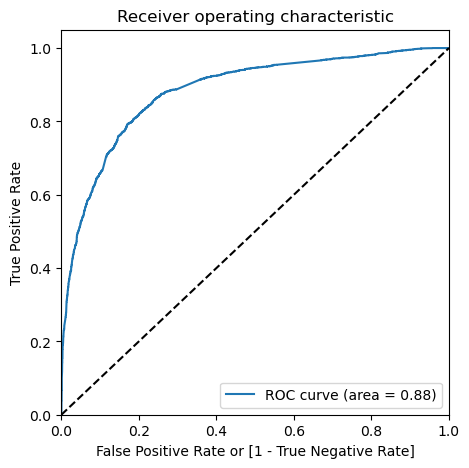

In [165]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.

In [166]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.431102         1871          0    1    1    1    1    1   
1          0        0.080141         6795          0    1    0    0    0    0   
2          0        0.268967         3516          0    1    1    1    0    0   
3          0        0.834429         8105          1    1    1    1    1    1   
4          0        0.108179         3934          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    0    0    0    0    0

In [167]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.554731  0.971208  0.298101
0.2   0.2  0.777829  0.886456  0.710895
0.3   0.3  0.801020  0.842660  0.775362
0.4   0.4  0.813389  0.775750  0.836582
0.5   0.5  0.808132  0.661395  0.898551
0.6   0.6  0.799474  0.593674  0.926287
0.7   0.7  0.788188  0.528386  0.948276
0.8   0.8  0.765615  0.433901  0.970015
0.9   0.9  0.717532  0.278994  0.987756


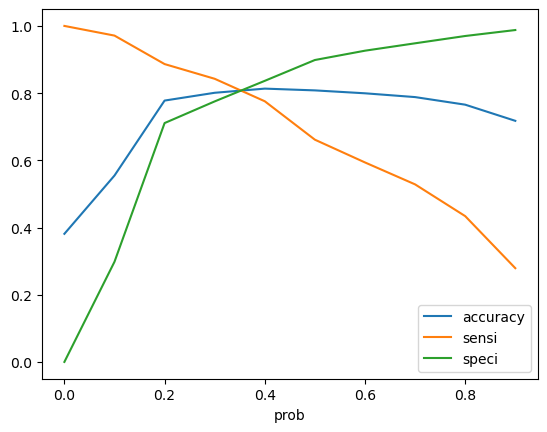

In [168]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, we can observe that the curves intersect at probability 0.35. Hence, we can consider it as the optimum cutoff probability.

In [169]:
# Finding the predicted values with the new threshold value of 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.431102         1871          0    1    1    1    1    1   
1          0        0.080141         6795          0    1    0    0    0    0   
2          0        0.268967         3516          0    1    1    1    0    0   
3          0        0.834429         8105          1    1    1    1    1    1   
4          0        0.108179         3934          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    0    0    0    0    0                0

In [170]:
# Check the new overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.809678416821274

We can observe that the new accuracy is more or less the same as that for the previous cutoff point of 0.5. Hence, lets proceed to calculate the other metrics.

In [171]:
# Creating the confusion matrix for the new cutoff point
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3239,  763],
       [ 468, 1998]], dtype=int64)

In [172]:
# Defining TP, TN, FP & FN
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Sensitivity / Recall calculation
TP / float(TP+FN)

0.8102189781021898

In [174]:
# Specificity calculation
TN / float(TN+FP)

0.8093453273363318

In [175]:
# False postive rate
print(FP/ float(TN+FP))

0.19065467266366817


In [176]:
# Precision / Positive predictive value 
print (TP / float(TP+FP))

0.723650851140891


In [177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8737523603992446


In [178]:
# Calculating F1 Score
from sklearn.metrics import f1_score
metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted, average='binary')

0.7644920604553281

In [179]:
# Creating a new column Lead_Score with the lead score values (Converted_prob * 100, rounded to the nearest whole number)
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x : round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.431102         1871          0    1    1    1    1    1   
1          0        0.080141         6795          0    1    0    0    0    0   
2          0        0.268967         3516          0    1    1    1    0    0   
3          0        0.834429         8105          1    1    1    1    1    1   
4          0        0.108179         3934          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                1          43  
1    0    0    0    0    0                0           8  
2    0    0    0    0    0                0          27  
3    1    1    1    1    0                1          83  
4    0    0    0    0    0                0          11

#### Precision-Recall Tradeoff

In [180]:
from sklearn.metrics import precision_recall_curve

In [181]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [182]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

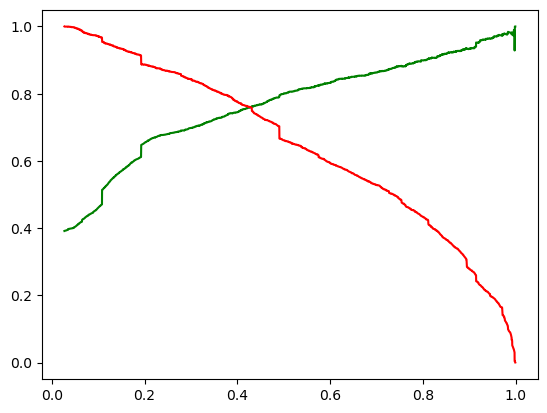

In [183]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the Test Set

In [184]:
# Scaling the test set variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [185]:
# Defining variable 'col' with the list of final predictor variables
col = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Specialization_Hospitality Management', 'Specialization_Unknown', 'Current Occupation_Working Professional', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent']

In [186]:
# Filtering out the final variables chosen by the model
X_test = X_test[col]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0     0.470588                     0.444982   
2376             0     0.000000                     0.000000   
7766             0     0.294118                     0.025968   
9199             0     0.000000                     0.000000   
4359             0     0.000000                     0.000000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4269                       0                             0   
2376                       0                             0   
7766                       0                             0   
9199                       1                             0   
4359                       0                             0   

      Specialization_Hospitality Management  Specialization_Unknown  \
4269                                      0                       1   
2376                                      0                       1   
7766                                      0                       0   
9199                                      0                       1   
4359                                      0                       0   

      Current Occupation_Working Professional  Last Notable Activity_Modified  \
4269                                        0                               0   
2376                                        0                               0   
7766                                        1                               0   
9199                                        0                               1   
4359                                        0                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_SMS Sent  
4269                               1  
2376                               1  
7766                               0  
9199                               0  
4359                               0

In [187]:
# Adding the constant for StatsModels
X_test_sm = sm.add_constant(X_test)

In [188]:
# Making predictions
y_test_pred = res.predict(X_test_sm)

In [189]:
y_test_pred[:10]

4269    0.783286
2376    0.914884
7766    0.840617
9199    0.108179
4359    0.894289
9186    0.610438
1631    0.448862
8963    0.142226
8007    0.092414
5324    0.360265
dtype: float64

In [190]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [191]:
# Let's see the head
y_pred_1.head()

0
4269  0.783286
2376  0.914884
7766  0.840617
9199  0.108179
4359  0.894289

In [192]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [193]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [194]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [195]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [196]:
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.783286
1          1         2376  0.914884
2          1         7766  0.840617
3          0         9199  0.108179
4          1         4359  0.894289

In [197]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [198]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [199]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.783286
1         2376          1        0.914884
2         7766          1        0.840617
3         9199          0        0.108179
4         4359          1        0.894289

In [200]:
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.783286                1
1         2376          1        0.914884                1
2         7766          1        0.840617                1
3         9199          0        0.108179                0
4         4359          1        0.894289                1

In [201]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8152958152958153

In [202]:
# Creating the confusion matrix for the test set
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1374,  303],
       [ 209,  886]], dtype=int64)

In [203]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [204]:
# Sensitivity / Recall calculation
TP / float(TP+FN)

0.8091324200913242

In [205]:
# Specificity calculation
TN / float(TN+FP)

0.8193202146690519

In [206]:
# False positive rate
FP/ float(TN+FP)

0.1806797853309481

In [207]:
# Precision / Positive Predictive Value 
TP / float(TP+FP)

0.7451640033641715

In [208]:
# Negative predictive value
TN / float(TN+ FN)

0.8679722046746684

In [209]:
# Calculating F1 Score
from sklearn.metrics import f1_score
metrics.f1_score(y_pred_final.Converted, y_pred_final.final_predicted, average='binary')

0.7758318739054291

In [210]:
# Creating a new column Lead_Score with the lead score values (Converted_prob * 100, rounded to the nearest whole number)
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map(lambda x : round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.783286                1          78
1         2376          1        0.914884                1          91
2         7766          1        0.840617                1          84
3         9199          0        0.108179                0          11
4         4359          1        0.894289                1          89

## VIII) Summarising the Metrics

### Comparing the Train and Test Set Metrics

#### Training Data:

Accuracy = 80.97% <br>
Sensitivity / Recall = 81.02% <br>
Specificity = 80.93% <br>
Precision = 72.36% <br>

#### Test Data:

Accuracy = 81.53% <br>
Sensitivity / Recall = 80.91% <br>
Specificity = 81.93% <br>
Precision = 74.51% <br>

#### Observations and Inferences

1. Precision values for both the train and test sets are lower than the Recall values. This is as per expectations, because Recall focuses on minimizing false negatives, i.e. it is concerned with ensuring that as many true positive cases as possible are captured. In the context of this business case, even if a lead is falsely classified as positive, there is no harm, as there is no loss of business. But if a lead is falsely classified as negative, that is undesirable as it is a loss of business. Hence, Recall needs to be given more importance than Precision in our case, and we have very good Recall values for both train and test sets. <br>
2. Overall Accuracy for both train and test sets is more than 80%, and so the model is overall performing well. This is aligned with the CEO's lead conversion target of 80%. <br>
3. Sensitivity (Recall) and specificity are more than 80% for both sets, which can be considered good.

## IX) Recommendations

In [211]:
# Feature variables from our finalised model along with their coefficients
res.params.sort_values(ascending=False)

Total Time Spent on Website                      4.461184
Lead Origin_Lead Add Form                        3.437260
Current Occupation_Working Professional          2.622515
Lead Source_Welingak Website                     2.538023
Last Notable Activity_SMS Sent                   1.396523
Lead Source_Olark Chat                           1.024588
TotalVisits                                      0.769778
Last Notable Activity_Modified                  -0.675070
Specialization_Hospitality Management           -1.055819
Lead Origin_Landing Page Submission             -1.118805
Specialization_Unknown                          -1.157055
Do Not Email                                    -1.208021
Last Notable Activity_Olark Chat Conversation   -1.231944
const                                           -1.301945
dtype: float64

From the above, we can observe that the top 5 variables that positively affect the lead conversion, along with their coefficients are as follows: <br>
1. Total Time Spent on Website                      : 4.461184 <br>
2. Lead Origin_Lead Add Form                        : 3.437260 <br>
3. Current Occupation_Working Professional          : 2.622515 <br>
4. Lead Source_Welingak Website                     : 2.538023 <br>
5. Last Notable Activity_SMS Sent                   : 1.396523 <br>

The top 5 variables that negatively affect the lead conversion, along with their coefficients are as follows: <br>
1. Last Notable Activity_Olark Chat Conversation   : -1.231944 <br>
2. Do Not Email                                    : -1.208021 <br>
3. Specialization_Unknown                          : -1.157055 <br>
4. Lead Origin_Landing Page Submission             : -1.118805 <br>
5. Specialization_Hospitality Management           : -1.055819 <br>

### Recommendations Based on the Predictor Variables

1. The time a lead spends on the website has a significant impact on the lead conversion rate. Leads who spend more time on the website are more likely to convert. Hence, such leads should be contacted on priority. <br>
2. Leads originating from the 'Lead Add Form' have higher chances of conversion; hence, such leads should be attended to on priority. <br>
3. Come up with marketing campaigns targeted towards working professionals. Better, tailor the course structure to suit working professionals, so that they are able to manage the courses along with their work. This can be a big selling point, so the marketing executives should really stress on this point during their calls / e-mails with the leads. <br>
4. Leads from 'Welingak' website have higher chances of conversion; hence, such leads should be attended to on priority. <br>
5. Leads whose last notable activity was 'SMS sent' have higher chances of conversion, and should be attended to on priority. <br>
6. Leads from 'Olark Chat' have higher chances of conversion; hence, such leads should be attended to on priority. <br>
7. Higher the total number of visits made by a lead on the website, higher is the chance of lead conversion. Hence, frequent website visitors should promptly be attended to. <br>
8. Leads whose last notable activity was 'Modified' have lower chances of conversion. <br>
9. Leads who are specialized in Hospitality Management have lower chances of conversion. Hence, such leads can be given lower priority. <br>
10. Leads originating from the 'Landing Page Submission' have lower chances of conversion; Hence, such leads can be given lower priority. <br>
11. Leads whose specialization is not known have lower chances of conversion. Hence, such leads can be given lower priority. <br>
12. If a lead has opted to not receive E-Mails, there are much lower chances of conversion. Hence, such leads are to be given lower priority.
13. Leads whose last notable activity was 'Olark Chat' conversation have lower chances of conversion. Hence, such leads are to be given lower priority.<br>

By selectively cherry-picking the leads to be contacted based on the above recommendations, the lead conversion rate can be significantly improved. The logistic regression model developed has an overall accuracy and other critical metrics above 80% (which is the lead conversion target given by the CEO), hence if these recommendations are duly followed, there will be a definite improvement in the lead conversion rate.

********************************************************************************************************************************